In [1]:
###################################################
import emcee
import numpy as np
import scipy

from astropy.io import fits
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
from functools import partial
import time
from astropy.coordinates import SkyCoord
import astropy.units as u
import pyccl as ccl
import clevar
import numpy as np
from astropy.table import Table
import clmm
from clevar.catalog import ClCatalog, MemCatalog
from clevar.match_metrics import recovery
import matplotlib.pyplot as plt
from clevar.match import MembershipMatch
from clevar.match_metrics import distances
from clevar.match_metrics import scaling
from clevar.match import ProximityMatch
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
###################################################

## Loading catalogs. Not needed 

In [2]:
# import numpy as np
# import matplotlib as mpl
# import sys
# sys.path.append("/sps/lsst/users/maguena/git_codes/wazp_dc2_paper/src_files/")
# import pyscritps as paper_tools
# from pyscritps import gaussian_paper as gp
# import clevar

# dc2dir = "/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full"
# cpath = f"{dc2dir}/wazp/pywazp_gaussian_new"
# hpath = f"{dc2dir}/halos"
# mt_path = "/sps/lsst/users/maguena/working/wazp_dc2/pywazp_new/"

# # select which pz scatter case to be used
# cases = ("010", "015", "020", "030", "050")

# # read catalogs
# data = gp.core.MainData(cpath, hpath, cases, mt_path=mt_path)

# # # Match catalogs
# data.load_match()


# # Compute max share fraction
# data.load_match_input()
# data.add_shared_frac_max()

# # Get matched pairs
# from clevar.match import get_matched_pairs



In [3]:
# def get_matched_catalogs(wazp, halos, sig):
#     h, w = get_matched_pairs(
#         halos,
#         wazp[sig],
#         f"cross.sig{sig}",
#     )
#     return h,w
# cat1, cat2 = get_matched_catalogs(data.wazp, data.halos, '010')
# cols_to_remove = [c for c in cat1.colnames if 'sig' in c]

# for col in cols_to_remove:
#     del cat1[col]

# cols_to_remove = [c for c in data.halos.colnames if 'sig' in c]

# for col in cols_to_remove:
#     del data.halos[col]
    
# cat1.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_catalog.fits", overwrite=True)
# cat2.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_cluster_010_photoz_catalog.fits", overwrite=True)
# data.halos.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cosmodc2_halo_catalog.fits", overwrite=True)
# data.wazp['010'].write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cluster_010_photoz_catalog.fits", overwrite=True)

# mask = (cat2["mt_cross"] != -1) & (cat2["mt_cross"] != None)
# cat_halo_cluster_match = cat2[mask]

# cat_halo_cluster_match["m200c"]     = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["halo_mass"]     = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["z_h"]       = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["ra_true"]   = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["dec_true"]  = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["NMEM_true"] = np.full(len(cat_halo_cluster_match), -1, dtype=int)  # richness is int
# display(cat_halo_cluster_match[cat_halo_cluster_match["mt_cross"] == str(7300151475)])

# m200c_halos = Table.read("/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full/halos/halos_m200c_13.0.fits")
# cat_halo_cluster_match["mt_cross"] = cat_halo_cluster_match["mt_cross"].astype(int)
# cat1["halo_id"] = cat1["halo_id"].astype(int)
# m200c_halos["halo_id"] = m200c_halos["halo_id"].astype(int)
# display(m200c_halos)
# j = 0
# for i, halo_idx in enumerate(cat_halo_cluster_match["mt_cross"]):

#     halo_row = cat1[cat1["halo_id"] == halo_idx]
#     m200c_row = m200c_halos[m200c_halos["halo_id"] == halo_idx]
#     if len(halo_row) != 1:
#         raise ValueError(f"halo_id {halo_idx} matched {len(halo_row)} rows")
#     halo_row = cat1[cat1["halo_id"] == halo_idx]
#     m200c_row = m200c_halos[m200c_halos["halo_id"] == halo_idx]

#     if len(halo_row) != 1:
#         raise ValueError(f"halo_id {halo_idx} matched {len(halo_row)} rows in cat1")

#     if len(m200c_row) != 1:
#         m200c_value = -1.0
#         j+=1
#     else:
#         m200c_value = m200c_row["m200c"][0]
#     cat_halo_cluster_match["halo_mass"][i]    = halo_row["halo_mass"][0]
#     cat_halo_cluster_match["m200c"][i]        = m200c_value # <-- extract scalar
#     cat_halo_cluster_match["z_h"][i]          = halo_row["redshift_true"][0]
#     cat_halo_cluster_match["ra_true"][i]      = halo_row["ra_true"][0]
#     cat_halo_cluster_match["dec_true"][i]     = halo_row["dec_true"][0]
#     cat_halo_cluster_match["NMEM_true"][i]    = halo_row["NMEM_z_star2"][0]
# display(cat_halo_cluster_match)
# print(j)
# cat_halo_cluster_match.write(
#     "/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_cluster_catalog.fits",
#     overwrite=True
# )


In [4]:
from astropy.table import Table

t_cl_halo_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_cluster_catalog.fits")

t_cl_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_cluster_010_photoz_catalog.fits")

t_halo_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_catalog.fits")
display(t_cl_halo_match)
t_cl_halo_match = t_cl_halo_match[t_cl_halo_match['m200c'] > -1]
display(t_cl_halo_match)
Mp, zp = 10**14.3, 0.5

###################################################
coord_cl = SkyCoord(t_cl_halo_match['ra'], t_cl_halo_match['dec'], unit='deg')
coord_h  = SkyCoord(t_cl_halo_match['ra_true'], t_cl_halo_match['dec_true'], unit='deg')

sep = coord_cl.separation(coord_h)
print("Median sep:", np.median(sep.to(u.arcmin)))
print("Max sep:", np.max(sep.to(u.arcmin)))

print(np.min(t_cl_halo_match['n200']))

ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max,m200c,halo_mass,z_h,ra_true,dec_true,NMEM_true
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
50.93591472649795,-41.34538693217072,0.05277125,14.847,1.122,143476,5.502,7300151475,7300151475,7300151475,7300151475,0.4725516024109578,0.2653061224489796,7300151475,0.4725516024109578,0.2653061224489796,63046332035245.07,74621860826501.4,0.04803776741027832,50.957678900761394,-41.3448059771583,13
49.49706323474621,-40.242985768257384,0.115748845,8.003,0.968,79349,6.684,43700151442,43700151442,43700151442,43700151442,0.7942936216414986,0.2127659574468085,43700151442,0.7942936216414986,0.2127659574468085,60807967862264.79,69213477135143.664,0.11421597003936768,49.50377592935664,-40.240490667975706,12
51.11978122453714,-39.620245431872505,0.14177611,7.075,0.861,154590,5.357,52300151442,52300151442,52300151442,52300151442,0.6244911071454774,0.20689655172413793,52300151442,0.6244911071454774,0.20689655172413793,58720563188461.98,62974036412214.086,0.1259174346923828,51.06907727982047,-39.64607328475867,16
50.530714428897404,-39.75747779430141,0.16513884,12.868,1.086,6608,13.427,70700151421,70700151421,70700151421,70700151421,0.7217595669711405,0.38461538461538464,70700151421,0.7217595669711405,0.38461538461538464,68254428849397.19,119985568407436.62,0.16475677490234375,50.52541974335929,-39.759854374325954,16
50.538536858117084,-39.068128185514055,0.22151783,28.22,1.026,15444,10.683,78600151411,78600151411,78600151411,78600151411,0.49027272998606314,0.3118279569892473,78600151411,0.49027272998606314,0.3118279569892473,120390041092326.77,148634909566197.2,0.21005773544311523,50.54038986767568,-39.0704158967892,31
50.17085292813019,-39.51418400574235,0.20489573,40.267,1.249,4532,14.847,95400151411,95400151411,95400151411,95400151411,0.8417974135174581,0.37662337662337664,95400151411,0.8417974135174581,0.37662337662337664,222022091351977.47,228279662101633.8,0.2076319456100464,50.170338564932,-39.51566808485035,59
50.63606969044204,-41.40247981147909,0.19032279,71.619,1.663,1341,20.345,130200151411,130200151411,130200151411,130200151411,0.7262666073048916,0.41089108910891087,130200151411,0.7262666073048916,0.41089108910891087,229655937300912.7,263934081687436.62,0.19159162044525146,50.64208660915858,-41.40265859512897,84
51.192978766528704,-40.8759233021217,0.17799073,12.546,1.08,25735,9.285,191900151411,191900151411,191900151411,191900151411,0.8547775541627649,0.4074074074074074,191900151411,0.8547775541627649,0.4074074074074074,116379211308709.86,127931588723380.28,0.18677890300750732,51.19489753953479,-40.87828426780436,24
50.13097168819828,-41.25581068917369,0.20250845,16.688,0.84,33799,8.605,253900151411,253900151411,253900151411,253900151411,0.3668106354029247,0.3611111111111111,253900151411,0.3668106354029247,0.3611111111111111,58288508524169.016,70912063920676.06,0.19323325157165527,50.13040773558871,-41.24880382828121,13


ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max,m200c,halo_mass,z_h,ra_true,dec_true,NMEM_true
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
50.93591472649795,-41.34538693217072,0.05277125,14.847,1.122,143476,5.502,7300151475,7300151475,7300151475,7300151475,0.4725516024109578,0.2653061224489796,7300151475,0.4725516024109578,0.2653061224489796,63046332035245.07,74621860826501.4,0.04803776741027832,50.957678900761394,-41.3448059771583,13
49.49706323474621,-40.242985768257384,0.115748845,8.003,0.968,79349,6.684,43700151442,43700151442,43700151442,43700151442,0.7942936216414986,0.2127659574468085,43700151442,0.7942936216414986,0.2127659574468085,60807967862264.79,69213477135143.664,0.11421597003936768,49.50377592935664,-40.240490667975706,12
51.11978122453714,-39.620245431872505,0.14177611,7.075,0.861,154590,5.357,52300151442,52300151442,52300151442,52300151442,0.6244911071454774,0.20689655172413793,52300151442,0.6244911071454774,0.20689655172413793,58720563188461.98,62974036412214.086,0.1259174346923828,51.06907727982047,-39.64607328475867,16
50.530714428897404,-39.75747779430141,0.16513884,12.868,1.086,6608,13.427,70700151421,70700151421,70700151421,70700151421,0.7217595669711405,0.38461538461538464,70700151421,0.7217595669711405,0.38461538461538464,68254428849397.19,119985568407436.62,0.16475677490234375,50.52541974335929,-39.759854374325954,16
50.538536858117084,-39.068128185514055,0.22151783,28.22,1.026,15444,10.683,78600151411,78600151411,78600151411,78600151411,0.49027272998606314,0.3118279569892473,78600151411,0.49027272998606314,0.3118279569892473,120390041092326.77,148634909566197.2,0.21005773544311523,50.54038986767568,-39.0704158967892,31
50.17085292813019,-39.51418400574235,0.20489573,40.267,1.249,4532,14.847,95400151411,95400151411,95400151411,95400151411,0.8417974135174581,0.37662337662337664,95400151411,0.8417974135174581,0.37662337662337664,222022091351977.47,228279662101633.8,0.2076319456100464,50.170338564932,-39.51566808485035,59
50.63606969044204,-41.40247981147909,0.19032279,71.619,1.663,1341,20.345,130200151411,130200151411,130200151411,130200151411,0.7262666073048916,0.41089108910891087,130200151411,0.7262666073048916,0.41089108910891087,229655937300912.7,263934081687436.62,0.19159162044525146,50.64208660915858,-41.40265859512897,84
51.192978766528704,-40.8759233021217,0.17799073,12.546,1.08,25735,9.285,191900151411,191900151411,191900151411,191900151411,0.8547775541627649,0.4074074074074074,191900151411,0.8547775541627649,0.4074074074074074,116379211308709.86,127931588723380.28,0.18677890300750732,51.19489753953479,-40.87828426780436,24
50.13097168819828,-41.25581068917369,0.20250845,16.688,0.84,33799,8.605,253900151411,253900151411,253900151411,253900151411,0.3668106354029247,0.3611111111111111,253900151411,0.3668106354029247,0.3611111111111111,58288508524169.016,70912063920676.06,0.19323325157165527,50.13040773558871,-41.24880382828121,13


Median sep: 0.138647 arcmin
Max sep: 19.6692 arcmin
5.0


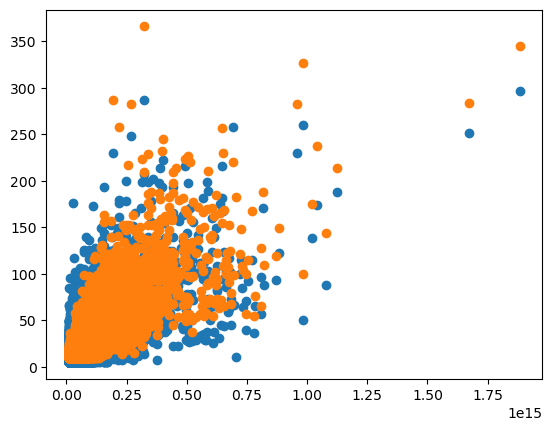

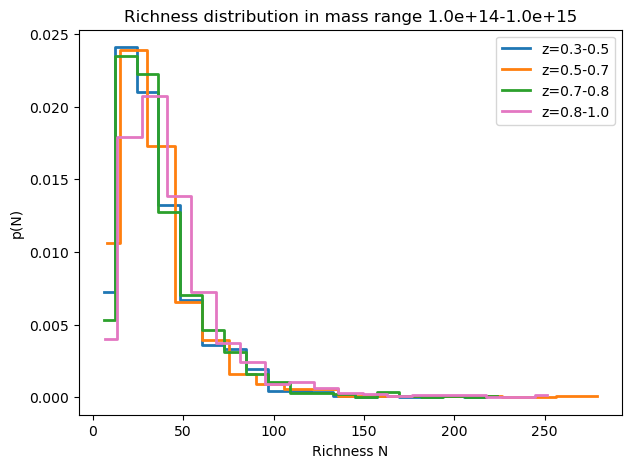

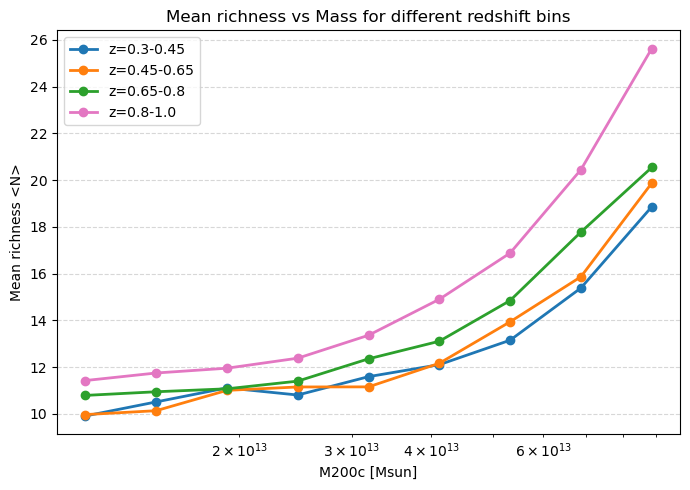

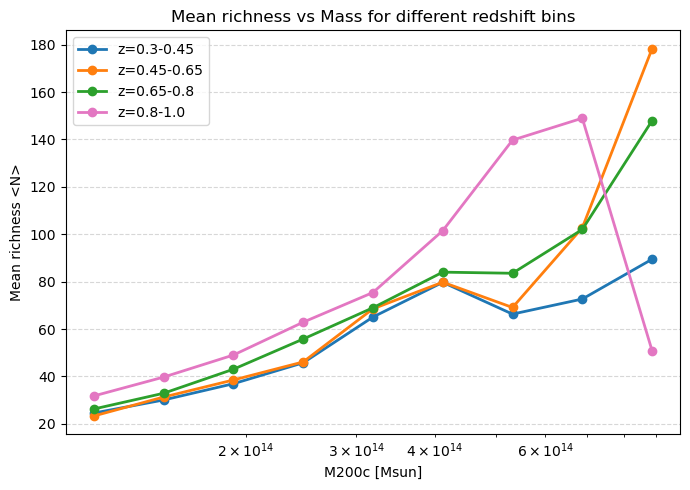

In [5]:
plt.scatter(t_cl_halo_match['m200c'], t_cl_halo_match['n200'], label="Cluster Richness")
plt.scatter(t_cl_halo_match['m200c'], t_cl_halo_match['NMEM_true'], label="True Richness")
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# --- Optional: restrict to a mass interval ---
mmin, mmax = 1e14, 1e15
mask_mass = (t_cl_halo_match['m200c'] > mmin) & (t_cl_halo_match['m200c'] < mmax)

# --- Redshift bins ---
z_bins = [0.3,  0.45, 0.65, 0.8,  1.]
z_labels = ["0.3-0.45", "0.45-0.65", "0.65-0.8", "0.8-1.0"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:pink"]

plt.figure(figsize=(7,5))

for i in range(len(z_bins)-1):
    zmin, zmax = z_bins[i], z_bins[i+1]
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    mask = mask_mass & mask_z
    rich_data = t_cl_halo_match['n200'][mask]
    
    if len(rich_data) == 0:
        continue
    
    bins = np.linspace(0, rich_data.max(), 20)  # linear richness bins
    hist, edges = np.histogram(rich_data, bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])
    
    plt.step(centers, hist, where='mid', color=colors[i], lw=2, label=f"z={zmin:.1f}-{zmax:.1f}")

plt.xlabel("Richness N")
plt.ylabel("p(N)")
plt.title(f"Richness distribution in mass range {mmin:.1e}-{mmax:.1e}")
plt.legend()
plt.show()

# --- Define redshift bins ---


# --- Define mass bins ---
mass_bins = np.logspace(13, 14, 10)  # e.g., 1e14 to 1e15 in 5 bins
mass_centers = 0.5 * (mass_bins[1:] + mass_bins[:-1])

plt.figure(figsize=(7,5))

# Loop over redshift bins
for zmin, zmax, color, zlabel in zip(z_bins[:-1], z_bins[1:], colors, z_labels):
    mean_richness = []
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    # Loop over mass bins
    for mmin, mmax in zip(mass_bins[:-1], mass_bins[1:]):
        mask_mass = (t_cl_halo_match['m200c'] >= mmin) & (t_cl_halo_match['m200c'] < mmax)
        mask = mask_z & mask_mass
        rich_data = t_cl_halo_match['n200'][mask]
        
        if len(rich_data) == 0:
            mean_richness.append(np.nan)
        else:
            mean_richness.append(np.mean(rich_data))
    
    plt.plot(mass_centers, mean_richness, marker='o', lw=2, color=color, label=f"z={zlabel}")

plt.xscale('log')
plt.xlabel("M200c [Msun]")
plt.ylabel("Mean richness <N>")
plt.title("Mean richness vs Mass for different redshift bins")
plt.grid(True, ls="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# --- Define mass bins ---
mass_bins = np.logspace(14, 15, 10)  # e.g., 1e14 to 1e15 in 5 bins
mass_centers = 0.5 * (mass_bins[1:] + mass_bins[:-1])

plt.figure(figsize=(7,5))

# Loop over redshift bins
for zmin, zmax, color, zlabel in zip(z_bins[:-1], z_bins[1:], colors, z_labels):
    mean_richness = []
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    # Loop over mass bins
    for mmin, mmax in zip(mass_bins[:-1], mass_bins[1:]):
        mask_mass = (t_cl_halo_match['m200c'] >= mmin) & (t_cl_halo_match['m200c'] < mmax)
        mask = mask_z & mask_mass
        rich_data = t_cl_halo_match['n200'][mask]
        
        if len(rich_data) == 0:
            mean_richness.append(np.nan)
        else:
            mean_richness.append(np.mean(rich_data))
    
    plt.plot(mass_centers, mean_richness, marker='o', lw=2, color=color, label=f"z={zlabel}")

plt.xscale('log')
plt.xlabel("M200c [Msun]")
plt.ylabel("Mean richness <N>")
plt.title("Mean richness vs Mass for different redshift bins")
plt.grid(True, ls="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Mass-Richness

In [6]:
def prior(params):
    if len(params) == 6:
        A, B, C, D, E, F = params
        if -2<C<2 and -2<E<2 and -2<F<2 and A > 0 and B > 0 and D > 0:
            return True
        else:
            return False
    else:
        A, B, D, E = params
        if -2<E<2 and A > 0 and B > 0 and D > 0:
            return True
        else:
            return False

In [7]:
richness = 'n200'
mass_cut = 2*10**13
rich_cut = 20
t_cl_halo_match_mor = t_cl_halo_match[(t_cl_halo_match['m200c'] > mass_cut) ]
def _ln_L(params, X, a, b, use_correction):
    # 1. Prior Check
    if not prior(params):
        return -np.inf
    
    # 2. Extract Data & Params
    pop, M, z = np.log(X[richness]), X["m200c"], X["zp"]
    
    if len(params) == 6:
        A, B, C, D, E, F = params
        mean_alpha = A + B*np.log(M/Mp) + C*np.log((1+z)/(1+zp))
        sigma = D + E*np.log(M/Mp) + F*np.log((1+z)/(1+zp))
    else:
        A, B, D, E = params
        mean_alpha = A + B*np.log(M/Mp)
        sigma = D + E*np.log(M/Mp)
    
    # 3. Physicality Check (Sigma must be positive for all points)
    if np.any(sigma <= 0):
        return -np.inf
    
    # 4. Standard Log-likelihood calculation
    # Using np.sum for speed and stability
    term1 = -0.5 * np.log(2 * np.pi * sigma**2)
    term2 = -0.5 * ((pop - mean_alpha) / sigma)**2
    ln_L = np.sum(term1 + term2)
    
    # 5. Optional Truncation Correction (Corrected logic)
    if use_correction:
        # P(a < n200 < b) = 0.5 * [erf((log(b)-mu)/(sig*sqrt2)) - erf((log(a)-mu)/(sig*sqrt2))]
        inv_sig_root2 = 1.0 / (sigma * np.sqrt(2))
        def erf_func(val):
            return scipy.special.erf((np.log(val) - mean_alpha) * inv_sig_root2)
        
        prob_in_bin = 0.5 * (erf_func(b) - erf_func(a))
        # Add the log of the normalization to the total likelihood
        ln_L -= np.sum(np.log(np.clip(prob_in_bin, 1e-10, None)))
        
    return ln_L

def MCMC(richesse_bin, redshift_bin, itt, redshift_params=True, correction=True, snr_cut = 0.0):
    a, b = richesse_bin
    c, d = redshift_bin
    
    # Selection
    mask = (t_cl_halo_match_mor[richness] > a) & (t_cl_halo_match_mor[richness] < b) & \
           (t_cl_halo_match_mor["zp"] > c) & (t_cl_halo_match_mor["zp"] < d) & \
           (t_cl_halo_match_mor["snr"] > snr_cut)
    X = t_cl_halo_match_mor[mask]
    
    if len(X) < 10: # Safety check for empty bins
        print(f"Warning: Bin {richesse_bin}, {redshift_bin} has only {len(X)} clusters.")
        return {'mean': np.zeros(6 if redshift_params else 4), 'std': np.zeros(6 if redshift_params else 4)}

    ndim = 6 if redshift_params else 4
    nwalkers = 24 # Use a multiple of 2 or 4 for better threading
    
    # Better initialization
    if redshift_params:
        guess = np.array([3.2, 0.8, 0.1, 0.5, 0.01, 0.01])
    else:
        guess = np.array([3.2, 0.8, 0.5, 0.01])
        
    p0 = [guess + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, _ln_L, args=[X, a, b, correction])
    sampler.run_mcmc(p0, itt, progress=True)
    
    # Correct result extraction (Flattening)
    burn_in = int(itt * 0.3)
    unflat_samples = sampler.get_chain(discard=burn_in, flat=False)
    flat_samples = sampler.get_chain(discard=burn_in, flat=True)  
    log_prob_unflat = sampler.get_log_prob(discard=burn_in, flat=False)
    log_prob_flat   = sampler.get_log_prob(discard=burn_in, flat=True)

    idx_best = np.argmax(log_prob_flat)
    theta_best = flat_samples[idx_best]
    
    return {
        'chains': unflat_samples,
        'log_prob': log_prob_unflat,
        'mean': np.mean(flat_samples, axis=0),
        'median': np.median(flat_samples, axis=0),
        'std': np.std(flat_samples, axis=0),
        'map': theta_best
    }

### Unbinned

100%|██████████| 5000/5000 [01:08<00:00, 73.47it/s]


A: mean=3.5824, std=0.0195
B: mean=0.8866, std=0.0220
C: mean=1.0339, std=0.1199
D: mean=0.4797, std=0.0102
E: mean=-0.0336, std=0.0060
F: mean=-0.0732, std=0.0517


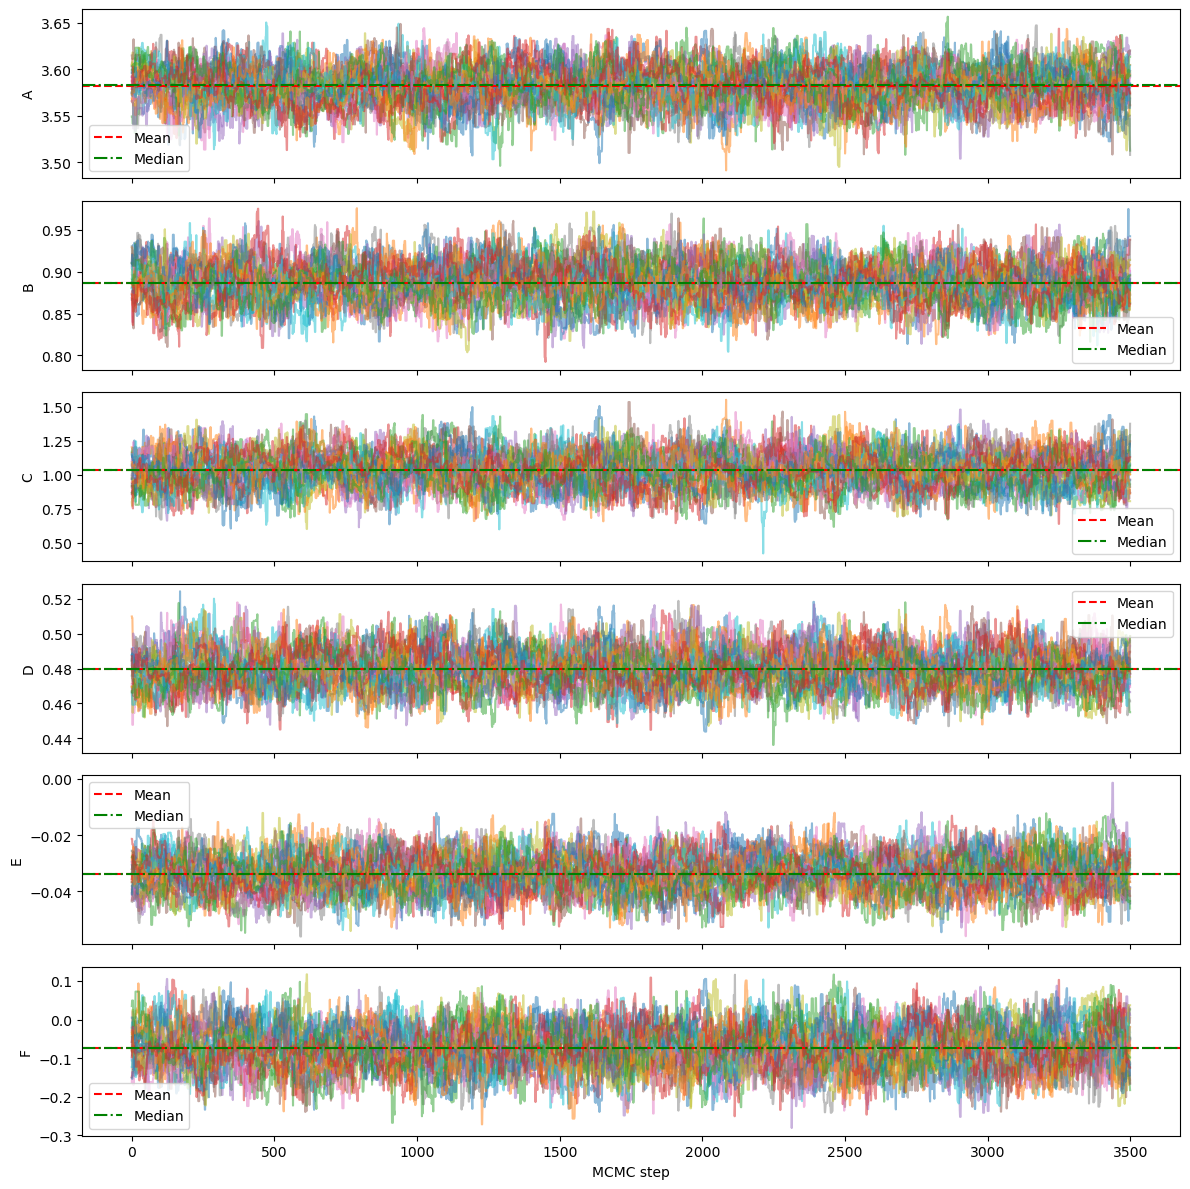

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

res = MCMC(richesse_bin=(rich_cut,400), 
           redshift_bin=(0.3,1.0), 
           itt=5000, redshift_params=True, correction=True, snr_cut = 0.0)

# Extract chains and statistics
chains = res['chains']  # shape: (nsteps, nwalkers, 6) or similar
means = res['mean']     # length 6
stds  = res['std']      # length 6

# Print best-fit values
param_names = ['A','B','C','D','E','F']
for i, name in enumerate(param_names):
    print(f"{name}: mean={means[i]:.4f}, std={stds[i]:.4f}")

# ------------------------------------------------------------------------------
# Plot chains to check convergence
# ------------------------------------------------------------------------------
n_params = 6
nsteps, nwalkers = chains.shape[0], chains.shape[1]

fig, axes = plt.subplots(n_params, 1, figsize=(12, 2*n_params), sharex=True)
for i in range(n_params):
    ax = axes[i]
    for w in range(nwalkers):
        ax.plot(chains[:, w, i], alpha=0.5)
    # Show mean and median lines
    mean_i = np.mean(chains[:, :, i])
    median_i = np.median(chains[:, :, i])
    ax.axhline(mean_i, color='red', linestyle='--', label='Mean')
    ax.axhline(median_i, color='green', linestyle='-.', label='Median')
    ax.set_ylabel(param_names[i])
    ax.legend()
axes[-1].set_xlabel('MCMC step')
plt.tight_layout()
plt.show()


## Testing Best Fit

A: MAP = 3.58842
B: MAP = 0.88197
C: MAP = 1.02116
D: MAP = 0.47782
E: MAP = -0.03282
F: MAP = -0.06945
14.300000000000002


/tmp/ipykernel_4861/3043203891.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


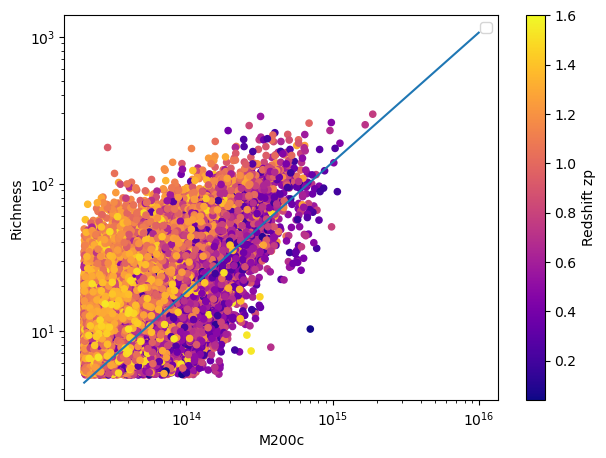

In [9]:
from crow import mass_proxy

logp = res['log_prob']
i, j = np.unravel_index(np.argmax(logp), logp.shape)
best_fit = chains[i, j]
for name, val in zip(param_names, best_fit):
    print(f"{name}: MAP = {val:.5f}")
mass_richness_unb = mass_proxy.MurataUnbinned(np.log10(Mp), zp)
best_fit_constantin = [3.35, 2.23 / np.log(10), 0.06, 0.56, 0.10/np.log(10), -0.05]
print(np.log10(np.exp(mass_richness_unb.pivot_ln_mass)))
mass_richness_unb.parameters["mu0"] = best_fit[0]
mass_richness_unb.parameters["mu1"] = best_fit[1]
mass_richness_unb.parameters["mu2"] = best_fit[2]
mass_richness_unb.parameters["sigma0"] = best_fit[3]
mass_richness_unb.parameters["sigma1"] = best_fit[4]
mass_richness_unb.parameters["sigma2"] = best_fit[5]


plt.figure(figsize=(7,5))

sc = plt.scatter(
    t_cl_halo_match_mor['m200c'],
    t_cl_halo_match_mor['n200'],
    c=t_cl_halo_match_mor['z_h'],
    cmap='plasma',
    s=20
)
# sc = plt.scatter(
#     t_cl_halo_match['m200c'],
#     t_cl_halo_match['n200'],
#     c=t_cl_halo_match['zp'],
#     cmap='viridis',
#     s=20
# )
rich_plot = np.linspace(np.log10(rich_cut),5, 200)
mass_plot = np.linspace(np.log10(mass_cut), 16, 200)
mean = mass_richness_unb.get_ln_mass_proxy_mean(mass_plot, np.array([0.4]))

plt.colorbar(sc, label="Redshift zp")
plt.xlabel("M200c")
plt.ylabel("Richness")
plt.legend()
plt.plot(10**mass_plot, np.exp(mean))
plt.xscale('log')
plt.yscale('log')
plt.show()


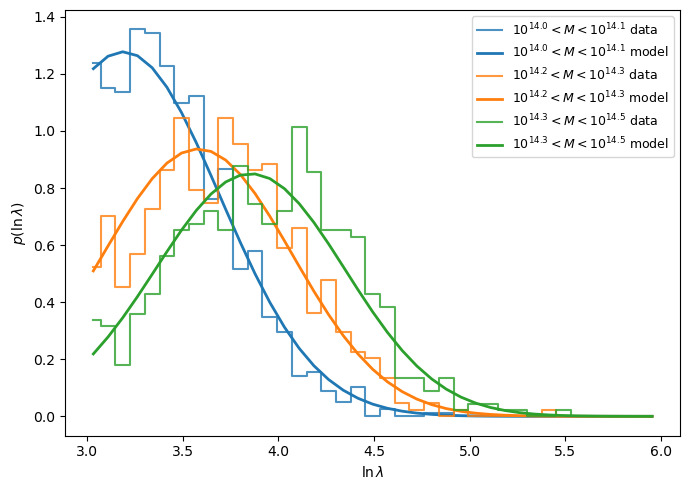

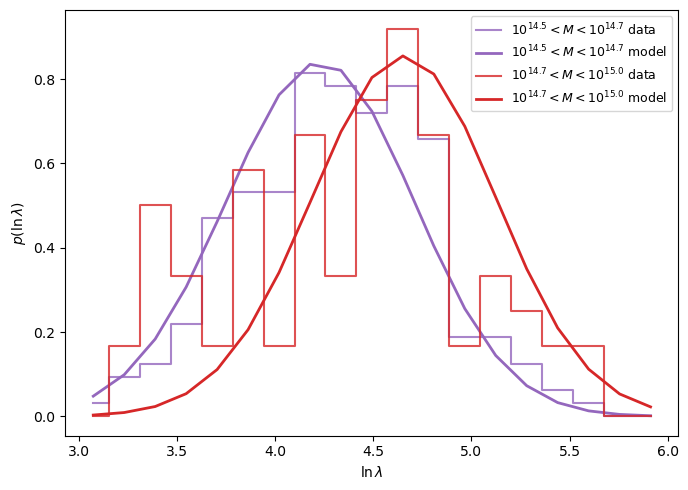

In [10]:
mass_bins_all = [
    (10**14.0, 10**14.1),
    (10**14.2, 10**14.3),
    (10**14.3, 10**14.5),
    (10**14.5, 10**14.7),
    (10**14.7, 10**15),
]

colors_all = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:red"]

# --- First figure: first three bins ---
plt.figure(figsize=(7,5))
for (mmin, mmax), col in zip(mass_bins_all[:3], colors_all[:3]):

    mask = (
        (t_cl_halo_match_mor['m200c'] > mmin) &
        (t_cl_halo_match_mor['m200c'] < mmax) &
        (t_cl_halo_match_mor['zp'] > 0.3) &
        (t_cl_halo_match_mor['zp'] < 1.0)
    )

    rich_data = t_cl_halo_match_mor['n200'][mask]
    z_data    = t_cl_halo_match_mor['zp'][mask]
    M_data    = t_cl_halo_match_mor['m200c'][mask]

    bins = np.linspace(np.log(rich_cut), np.log(400), 40)
    hist, edges = np.histogram(np.log(rich_data), bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    pdf = []
    for lnlam in centers:
        log10lam = lnlam / np.log(10)
        vals = mass_richness_unb.distribution(
                  np.log10(M_data),
                  z_data,
                  np.full_like(M_data, log10lam)
               )
        pdf.append(np.mean(vals))
    pdf = np.array(pdf)

    label = fr"$10^{{{np.log10(mmin):.1f}}} < M < 10^{{{np.log10(mmax):.1f}}}$"
    plt.step(centers, hist/np.trapezoid(hist, centers), where='mid', color=col, alpha=0.8, label=label + " data")
    plt.plot(centers, pdf/np.trapezoid(pdf, centers), color=col, lw=2, label=label + " model")

plt.xlabel(r"$\ln \lambda$")
plt.ylabel(r"$p(\ln \lambda)$")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


# --- Second figure: last two bins ---
plt.figure(figsize=(7,5))
for (mmin, mmax), col in zip(mass_bins_all[3:], colors_all[3:]):

    mask = (
        (t_cl_halo_match_mor['m200c'] > mmin) &
        (t_cl_halo_match_mor['m200c'] < mmax) &
        (t_cl_halo_match_mor['zp'] > 0.3) &
        (t_cl_halo_match_mor['zp'] < 1.0)
    )

    rich_data = t_cl_halo_match_mor['n200'][mask]
    z_data    = t_cl_halo_match_mor['zp'][mask]
    M_data    = t_cl_halo_match_mor['m200c'][mask]

    bins = np.linspace(np.log(rich_cut), np.log(400), 20)
    hist, edges = np.histogram(np.log(rich_data), bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    pdf = []
    for lnlam in centers:
        log10lam = lnlam / np.log(10)
        vals = mass_richness_unb.distribution(
                  np.log10(M_data),
                  z_data,
                  np.full_like(M_data, log10lam)
               )
        pdf.append(np.mean(vals))
    pdf = np.array(pdf)

    label = fr"$10^{{{np.log10(mmin):.1f}}} < M < 10^{{{np.log10(mmax):.1f}}}$"
    plt.step(centers, hist/np.trapezoid(hist, centers), where='mid', color=col, alpha=0.8, label=label + " data")
    plt.plot(centers, pdf/np.trapezoid(pdf, centers), color=col, lw=2, label=label + " model")

plt.xlabel(r"$\ln \lambda$")
plt.ylabel(r"$p(\ln \lambda)$")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


## Test Prediction

In [11]:
import numpy as np
import pyarrow.parquet as pq
cluster_catalo_wazp = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cluster_010_photoz_catalog.fits")
display(cluster_catalo_wazp)
# 1. Define bins
richness_bins_linear = [20, 40, 80, 200]

# We bin in log10 space
richness_bins_log = np.log10(richness_bins_linear)


# 3. Process data into numpy
# Converting directly to log10 here avoids creating a third massive array
print("Converting richness to log10...")
log10_richness_data = np.log10(cluster_catalo_wazp['n200'])
redshift_data = cluster_catalo_wazp['zp']


# 4. Compute 2D Histogram
print("Computing 2D histogram...")
counts, z_edges, l_edges = np.histogram2d(
    redshift_data,
    log10_richness_data,  
    bins=[z_bins, richness_bins_log]
)
print(l_edges)
# 5. Save to TXT
header = (f"Richness_bins_log_edges: {richness_bins_log}\n"
          f"Redshift_bins_edges: {z_bins}\n"
          "Rows: Richness bins | Cols: Redshift bins")


print(counts)
print(len(counts))

ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,bytes13,float64,float64
47.82499339282766,-35.675710462690425,0.787805,7.62,0.422,240271,4.542,--,--,--,--,0.0,0.0,--,0.0,0.0
47.830811472387325,-30.007016653453594,0.94940674,6.283,0.436,373353,3.744,--,--,--,--,0.0,0.0,--,0.0,0.0
47.842703745653075,-27.266088774225345,0.9619872,8.964,0.422,109671,6.024,--,--,--,--,0.0,0.0,--,0.0,0.0
47.84613176343512,-27.260573733477237,1.2169273,9.782,0.425,244956,4.507,--,--,--,--,0.0,0.0,--,0.0,0.0
47.850813839353314,-29.99932990011379,1.0275872,6.025,0.398,271873,4.323,2390300051241,2390300051241,2390300051241,2390300051241,0.7155331405146373,0.6,2390300051241,0.7155331405146373,0.6
47.85285990968647,-27.28160033526319,1.2050031,14.534,0.487,233551,4.594,--,--,--,--,0.0,0.0,--,0.0,0.0
47.85313305023591,-27.26307594123677,0.5584858,8.045,0.588,506070,3.174,--,--,--,--,0.0,0.0,--,0.0,0.0
47.859885397526924,-41.85132730704162,1.227102,9.499,0.33,73500,6.846,--,--,--,--,0.0,0.0,--,0.0,0.0
47.860099746318305,-41.78852804890636,1.245531,7.118,0.3,394441,3.644,--,--,--,--,0.0,0.0,--,0.0,0.0


Converting richness to log10...
Computing 2D histogram...
[1.30103    1.60205999 1.90308999 2.30103   ]
[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]
4


In [12]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
from scipy.interpolate import interp1d

from crow import ClusterShearProfile
from crow import ClusterAbundance
from crow.recipes.binned_exact import ExactBinnedClusterRecipe
from crow.recipes.binned_grid import GridBinnedClusterRecipe
from crow import completeness_models, mass_proxy, purity_models, kernel
from crow.properties import ClusterProperty

# ---- Core cosmology and HMF (same numbers as your example) ----
hmf = ccl.halos.MassFuncDespali16(mass_def="200c")

cosmo = ccl.Cosmology(
    Omega_c=0.1109 / 0.71**2,
    Omega_b=0.02258 / 0.71**2,
    h=0.71,
    n_s=0.963,
    sigma8=0.8,
    w0=-1.0,
    wa=0.0,
    transfer_function="boltzmann_camb"
)

# ---- Common grid / binning parameters for later cells ----
mass_grid_size = 80
redshift_grid_size = 40
proxy_grid_size = 40
sky_area = 440
mass_interval = (12.5, 16.0)


cl_abundandce = ClusterAbundance(cosmo, hmf)

[[ 0.00618876  0.16302028  0.06803558]
 [-0.19853578 -0.09883279 -0.21485365]
 [-0.04243998 -0.07419766  0.00911528]
 [ 0.21897576  0.15600641  0.20501851]]
Fiducial Counts [[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]
Prediction no completeness Counts [[ 773.18514782  198.36419275   39.14250548]
 [1820.57584504  440.63194799   80.18034098]
 [1865.96756274  423.23387945   70.35281509]
 [2888.22762704  608.51937535   91.42287166]]


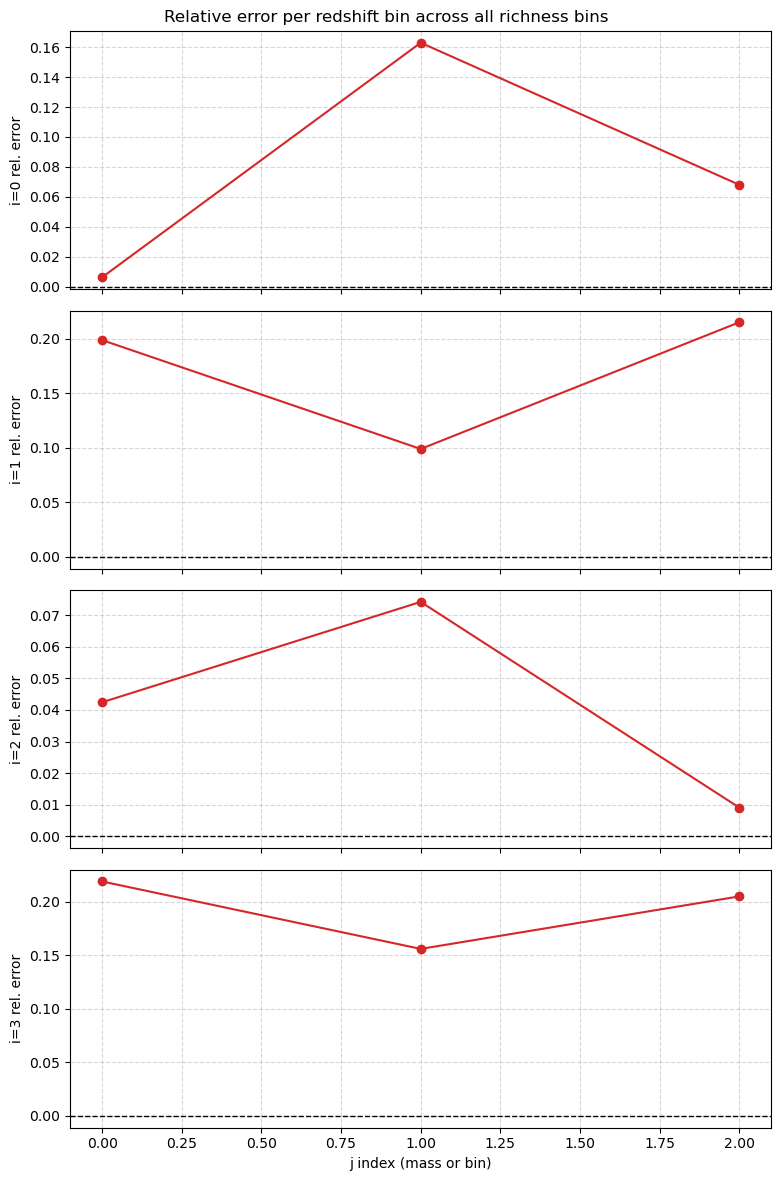

[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]


In [13]:

z_bins_tuple = [(z_edges[i], z_edges[i+1]) for i in range(len(z_bins) -1)]
proxy_bins = [(l_edges[i], l_edges[i+1]) for i in range(len(richness_bins_linear) - 1)]
redshift_distribution = kernel.SpectroscopicRedshift()


recipe_grid_nocomp = GridBinnedClusterRecipe(
    mass_interval=mass_interval,
    cluster_theory=cl_abundandce,
    redshift_distribution=redshift_distribution,
    mass_distribution=mass_richness_unb,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
)
recipe_grid_nocomp.setup()



grid_nocomp_vals  = np.zeros((len(z_bins) -1,len(richness_bins_linear) - 1))

for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_nocomp_vals[i,j]  = recipe_grid_nocomp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)
print(1 - grid_nocomp_vals / counts)
print("Fiducial Counts", counts)
print("Prediction no completeness Counts", grid_nocomp_vals)


# Assume your matrix: rel_error_matrix[i, j] = 1 - grid_nocomp_vals[i, j] / counts[i, j]
rel_error_matrix = abs(1 - grid_nocomp_vals / counts)
n_i, n_j = rel_error_matrix.shape

# --- Create subplots: one row per i ---
fig, axes = plt.subplots(n_i, 1, figsize=(8, 3*n_i), sharex=True)

if n_i == 1:
    axes = [axes]  # make iterable if only 1 subplot

for i in range(n_i):
    axes[i].plot(np.arange(n_j), rel_error_matrix[i], marker='o', linestyle='-', color='tab:red')
    axes[i].axhline(0, color='k', linestyle='--', lw=1)
    axes[i].set_ylabel(f"i={i} rel. error")
    axes[i].grid(True, ls="--", alpha=0.5)

axes[-1].set_xlabel("j index (mass or bin)")
plt.suptitle("Relative error per redshift bin across all richness bins")
plt.tight_layout()
plt.show()


print(counts)

### Save to Sacc

In [14]:
from astropy.io import fits
from scipy import stats
from typing import Any
import sacc
import itertools
area = 439.78986
covariance = np.diag(counts.flatten())
s_count = sacc.Sacc()
bin_z_labels = []
bin_richness_labels = []

survey_name = "cosmodc2_wazp_halos"
s_count.add_tracer("survey", survey_name, area)

for i, z_bin in enumerate(zip(z_edges[:-1], z_edges[1:])):
    lower, upper = z_bin
    bin_z_label = f"bin_z_{i}"
    s_count.add_tracer("bin_z", bin_z_label, lower, upper)
    bin_z_labels.append(bin_z_label)

for i, richness_bin in enumerate(zip(l_edges[:-1], l_edges[1:])):
    lower, upper = richness_bin
    bin_richness_label = f"rich_{i}"
    s_count.add_tracer("bin_richness", bin_richness_label, lower, upper)
    bin_richness_labels.append(bin_richness_label)

#  pylint: disable-next=no-member
cluster_count = sacc.standard_types.cluster_counts

counts_and_edges = zip(
    counts.flatten(), itertools.product(bin_z_labels, bin_richness_labels)
)
print(counts)

for counts_i, (bin_z_label, bin_richness_label) in counts_and_edges:
    s_count.add_data_point(
        cluster_count, (survey_name, bin_richness_label, bin_z_label), int(counts_i)
    )
s_count.add_covariance(covariance)
s_count.to_canonical_order()
#s_count.save_fits("./outputs/clusters_sacc_file_cov.sacc", overwrite=True)
s_count.save_fits("./cosmodc2_wazp_counts/clusters_sacc_file.sacc", overwrite=True)
print(s_count.data)

[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]
[DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_0'), value=778, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_1'), value=1519, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_2'), value=1790, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_3'), value=3698, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_0'), value=237, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_1'), value=401, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_2'), value=394, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_3'), value=721, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_h

## Miscentering

/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/clevar/catalog/tagdata.py:338: UserWarning: There is a column with the same name as the tag setup. cat['ra'] calls cat['ra_true'] now. To get 'ra' column, use cat.data['ra'].
  warnings.warn(
/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/clevar/catalog/tagdata.py:338: UserWarning: There is a column with the same name as the tag setup. cat['dec'] calls cat['dec_true'] now. To get 'dec' column, use cat.data['dec'].
  warnings.warn(


Angular separation: min=9.836362680470238e-06, max=0.32782030323490335
Max R_off [Mpc]: 2.0517
Mean R_off [Mpc]: 0.0989
Median R_off [Mpc]: 0.0646


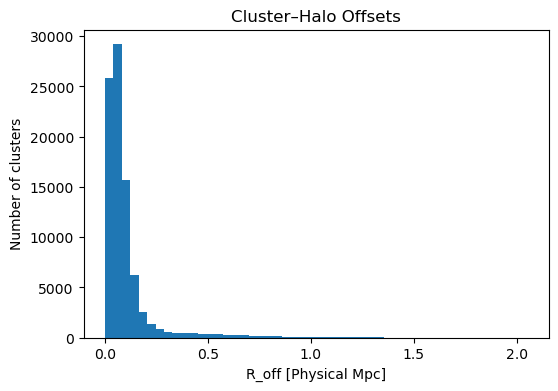

In [15]:
cat_cl = ClCatalog('clusters', data=t_cl_halo_match, tags={'ra': 'ra', 'dec': 'dec', 'redshift':'zp'})
cat_halo = ClCatalog('halos', data=t_cl_halo_match, tags={'ra': 'ra_true', 'dec': 'dec_true', 'redshift':'z_h'})

cat_cl._add_skycoord()
cat_halo._add_skycoord()

mt = MembershipMatch()
ang_sep = mt._get_dist_mt(cat_cl, cat_halo, "angular_proximity")  

print(f"Angular separation: min={np.min(ang_sep)}, max={np.max(ang_sep)}")

ang_sep_rad = np.deg2rad(ang_sep)

h = 0.71
Omega_c = 0.1109 / h**2     # 0.2198
Omega_b = 0.02258 / h**2    # 0.0448

cosmo_dc2 = ccl.Cosmology(
    Omega_c = Omega_c,
    Omega_b = Omega_b,
    h       = h,
    sigma8  = 0.8,
    n_s     = 0.963,
    m_nu    = 0.0,
    w0      = -1.0,
    wa      = 0.0
)

cosmo = clevar.cosmology.CCLCosmology(be_cosmo = cosmo_dc2)
#cosmo = clevar.cosmology.AstroPyCosmology()
R_off = cosmo.rad2mpc(ang_sep_rad, cat_halo['redshift'])

# Step 5 — Add to your table
t_cl_halo_match['R_off'] = R_off

# Step 6 — Diagnostics
print(f"Max R_off [Mpc]: {np.max(R_off):.4f}")
print(f"Mean R_off [Mpc]: {np.mean(R_off):.4f}")
print(f"Median R_off [Mpc]: {np.median(R_off):.4f}")

# Step 7 — Histogram
plt.figure(figsize=(6,4))
plt.hist(R_off, bins=50)
plt.xlabel("R_off [Physical Mpc]")
plt.ylabel("Number of clusters")
plt.title("Cluster–Halo Offsets")
plt.show()

MCMC progress: 100%|██████████| 4000/4000 [00:20<00:00, 191.13it/s]

Sigma offset: 0.049 +0.000 -0.000 Mpc


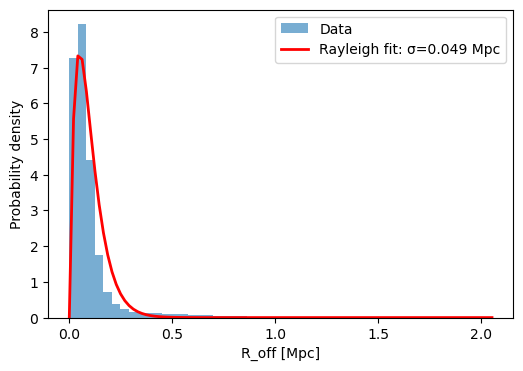

The paper offset is: 0.001449


In [16]:
R = np.array(t_cl_halo_match['R_off'])  # in Mpc
def log_likelihood(theta, R):
    sigma = theta[0]
    if sigma <= 0:
        return -np.inf
    return np.sum(np.log(R / sigma**2) - R / sigma)

def log_prior(theta):
    sigma = theta[0]
    if 0 < sigma < 5.0:  # Mpc
        return 0.0
    return -np.inf

def log_posterior(theta, R):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, R)

# MCMC setup
ndim = 1  # only sigma
nwalkers = 32
nsteps = 4000
initial = 0.2 + 0.01 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(R,))

samples_list = []
with tqdm(total=nsteps, desc="MCMC progress") as pbar:
    for sample in sampler.sample(initial, iterations=nsteps, progress=False):
        pbar.update(1)
    samples_list.append(sampler.get_chain())

samples = sampler.get_chain(discard=1000, flat=True)
sigma_mcmc = np.percentile(samples[:,0], [16, 50, 84])
print(f"Sigma offset: {sigma_mcmc[1]:.3f} +{sigma_mcmc[2]-sigma_mcmc[1]:.3f} -{sigma_mcmc[1]-sigma_mcmc[0]:.3f} Mpc")

sigma_best = sigma_mcmc[1]
R_plot = np.linspace(0, np.max(R), 100)
pdf = (R_plot / sigma_best**2) * np.exp(-R_plot / sigma_best)

plt.figure(figsize=(6,4))
plt.hist(R, bins=50, density=True, alpha=0.6, label="Data")
plt.plot(R_plot, pdf, 'r-', lw=2, label=f"Rayleigh fit: σ={sigma_best:.3f} Mpc")
plt.xlabel("R_off [Mpc]")
plt.ylabel("Probability density")
plt.legend()
plt.show()
cosmodc2_paper =  0.03 * (1.07*0.04 + 0.19 * 0.03 - 0.02*0.01 )
print(f"The paper offset is: {cosmodc2_paper}")



## Selection

### Catalogs

In [17]:
import numpy as np
import matplotlib as mpl
import sys
sys.path.append("/sps/lsst/users/maguena/git_codes/wazp_dc2_paper/src_files/")
import pyscritps as paper_tools
from pyscritps import gaussian_paper as gp
import clevar

dc2dir = "/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full"
cpath = f"{dc2dir}/wazp/pywazp_gaussian_new"
hpath = f"{dc2dir}/halos"
mt_path = "/sps/lsst/users/maguena/working/wazp_dc2/pywazp_new/"

# select which pz scatter case to be used
cases = ("010", "015", "020", "030", "050")

# read catalogs
data = gp.core.MainData(cpath, hpath, cases, mt_path=mt_path)

# # Match catalogs
data.load_match()


# Compute max share fraction
data.load_match_input()
data.add_shared_frac_max()

# Get matched pairs
from clevar.match import get_matched_pairs
def get_matched_catalogs(wazp, halos, sig):
    h, w = get_matched_pairs(
        halos,
        wazp[sig],
        f"cross.sig{sig}",
    )
    return h,w
cat1, cat2 = get_matched_catalogs(data.wazp, data.halos, '010')


Remove duplicates
165,076
165,033


*** 010 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    408,092
 * multiple (self):  111,245
 * multiple (other): 111,245
 * unique (self):    93,048
 * unique (other):   93,088
 * cross:            93,024

Halo
    * ClEvar used in matching: 0.17.1
 * Total objects:    165,033
 * multiple (self):  96,213
 * multiple (other): 96,213
 * unique (self):    93,088
 * unique (other):   93,048
 * cross:            93,024


*** 015 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    354,187
 * multiple (self):  112,585
 * multiple (other): 112,585
 * unique (self):    90,890
 * unique (other):   90,949
 * cross:            90,844

Halo
    * ClEvar used in matching: 0.17.1
 * Total objects:    165,033
 * multiple (self):  95,000
 * multiple (other): 95,000
 * unique (self):    90,949
 * unique (other):   90,890
 * cross:            90,844


*** 020 ***
WaZP
    * ClEvar used in matching: 0.17.1
 * Total objects:    308,18

In [18]:
t_halo_m200c = Table.read("/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full/halos/halos_m200c_13.0.fits")
c1 = data.halos
display(c1)
c2 = data.wazp['010']
display(t_halo_m200c)
display(c2)
c1['halo_id'] = c1['halo_id'].astype(int)
index = {hid: m for hid, m in zip(t_halo_m200c['halo_id'],
                                  t_halo_m200c['m200c'])}
m200c = np.full(len(c1), -1.0)
logm  = np.full(len(c1), -1.0)

for i, hid in enumerate(c1['halo_id']):
    if hid in index:
        val = index[hid]
        m200c[i] = val
        if val > 0:
            logm[i] = np.log10(val)

c1['m200c'] = m200c
c1['log_m200c'] = logm
c2['log_n200'] = np.log10(c2['n200'])

halo_id,ra_true,dec_true,ra,dec,redshift_true,mass_fof,m200c,r200c,skysim_halo_id,NMEM,richness,NMEM_g_star2,NMEM_r_star2,NMEM_i_star2,NMEM_z_star2,NMEM_y_star2,richness_g_star2,richness_r_star2,richness_i_star2,richness_z_star2,richness_y_star2,ra_bary,dec_bary
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
1600020475,50.77596621112012,-27.11267297840223,50.775875822529436,-27.112584328955446,0.04530489444732666,2.247e+13,18901145086557.746,0.5539122181878964,4308786475,14,8.259415690053675,4,2,2,2,2,3.3159297517335684,2.0,2.0,2.0,2.0,50.86080257640612,-27.111068884566034
2700020475,49.46685631106464,-25.960657456295777,49.466814189348334,-25.960541211222015,0.04615640640258789,1.633e+13,15062094204754.93,0.5136732064502341,5608786475,14,7.310438276043445,7,5,5,5,5,3.9505018568471444,3.162710828265532,3.162710828265532,3.162710828265532,3.162710828265532,49.430749682006216,-26.004253136511434
17200020453,50.16400668612118,-25.25905307744378,50.16585579512233,-25.259404686564693,0.08653247356414795,2.283e+13,20441971397588.734,0.5883426733419929,9508786453,12,5.623277102797734,5,5,5,4,4,3.3387389360236903,3.3387389360236903,3.3387389360236903,3.130245439035445,3.130245439035445,50.10887874151731,-25.222612608640762
19000020453,49.51595503782168,-26.130631687629403,49.51865674267036,-26.131426039026245,0.09413313865661621,1.199e+13,10668658238016.902,0.47378993370163613,29908786453,15,6.997234500189672,7,7,7,7,7,3.975938934627579,3.975938934627579,3.975938934627579,3.975938934627579,3.975938934627579,49.526283728873516,-26.143323644925193
19800020453,50.68971804154461,-26.886508987581664,50.691634217578326,-26.88681304144144,0.08739697933197021,8.412e+13,71624983358738.03,0.8935768839339135,10408786453,25,10.377440167337566,12,11,9,8,8,5.102184303491505,4.807846043434688,4.353673518160678,4.0503547588246684,4.0503547588246684,50.71067924047927,-26.883765517046655
32800020453,51.49229315287324,-26.308837160731073,51.49405530538187,-26.309071814426567,0.08795535564422607,1.328e+13,10371945197971.832,0.4693405728944591,14908786453,7,4.078294904689155,2,2,2,2,2,1.284161206475952,1.284161206475952,1.284161206475952,1.284161206475952,1.284161206475952,51.53207787114288,-26.281769096943737
2000020442,51.02799219278836,-25.768148487504888,51.03054382968504,-25.767733992572435,0.10751283168792725,3.555e+13,31256384653340.848,0.6889763852240335,9408786442,22,9.068648511775608,3,3,3,3,2,1.7669316487994353,1.7669316487994353,1.7669316487994353,1.7669316487994353,1.5330209172234177,51.04052597864433,-25.76994686512187
32300020442,51.47772552281113,-25.82579874206229,51.48013416475692,-25.825311694587846,0.10751473903656006,1.339e+13,11587427913554.93,0.49502278717470843,43208786442,10,5.4538674639470575,5,4,4,3,3,3.6826146155436636,2.6826146155436636,2.6826146155436636,2.0956992167416817,2.0956992167416817,51.46172414586285,-25.805957090122217
33300020442,50.31241043560731,-26.69591460405023,50.315518939516316,-26.69559169836869,0.108817458152771,3.434e+13,29876928281239.438,0.6786574780101507,44708786442,16,6.788349932828027,8,8,8,8,8,4.952319670491652,4.952319670491652,4.952319670491652,4.952319670491652,4.952319670491652,50.28802465790821,-26.712593565283026


## Completeness

In [19]:
from crow import completeness_models
from crow import purity_models

purity_aguena = purity_models.PurityAguena16()
completeness_aguena = completeness_models.CompletenessAguena16()
###################### MCMC ########################
def log_prior(theta):
    """Define the search space for a_n, b_n, a_logm_piv, b_logm_piv."""
    a_n, b_n, a_logm_piv, b_logm_piv = theta
    # Example bounds: adjust based on your specific Aguena16 priors
    if -5.0 < a_n < 20.0 and -5.0 < b_n < 25.0 and 0.0 < a_logm_piv < 26.0 and 0.0 < b_logm_piv < 20.0:
        return 0.0
    return -np.inf

def log_likelihood_gauss(theta, log_mass, z, r, sigma):

    completeness_aguena.parameters["a_n"] = theta[0]
    completeness_aguena.parameters["b_n"] = theta[1]
    completeness_aguena.parameters["a_logm_piv"] = theta[2]
    completeness_aguena.parameters["b_logm_piv"] = theta[3]

    p = completeness_aguena.distribution(log_mass, z)

    if np.any(np.isnan(p)):
        return -np.inf

    chi2 = (r - p)**2 / sigma**2

    return -0.5 * np.sum(chi2 + np.log(2*np.pi*sigma**2))

def log_probability(theta, log_mass, z, r, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_gauss(theta, log_mass, z, r, sigma)

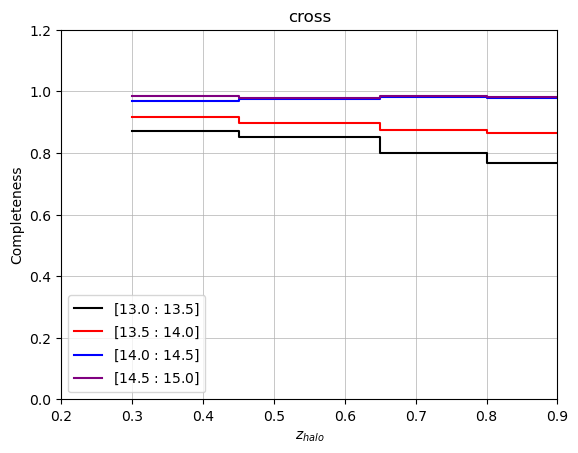

{'recovery': array([[0.87219101, 0.91613179, 0.97008547, 0.98387097],
       [0.8511206 , 0.89871316, 0.97374897, 0.97916667],
       [0.8008342 , 0.87372749, 0.98027613, 0.98571429],
       [0.76755477, 0.86546584, 0.97974684, 0.98245614]]), 'edges1': array([0.3 , 0.45, 0.65, 0.8 , 1.  ]), 'edges2': array([13. , 13.5, 14. , 14.5, 15. ]), 'matched': array([[ 621, 2141,  681,   61],
       [1595, 4330, 1187,   94],
       [2304, 4463,  994,   69],
       [6482, 6967, 1161,   56]]), 'counts': array([[ 712, 2337,  702,   62],
       [1874, 4818, 1219,   96],
       [2877, 5108, 1014,   70],
       [8445, 8050, 1185,   57]])}


In [20]:
redshift_col = 'redshift_true' 
mass_col = 'log_m200c'
#plot style
figx=10
figy=7
matching_selected = 'cross'
#recovery_plot
#zbins = np.array([0.2,  0.4, 0.6, 0.8])
zbins = z_bins
mbins = np.array([13., 13.5, 14., 14.5, 15.])
#zbins = np.linspace(0, 1.6, 9)
#mbins = np.logspace(14, 15, 5)
fig = plt.figure()#figsize=(figx,figy))
info_comp = r_cf.plot(c1, col1=redshift_col, col2=mass_col, bins1=zbins, bins2=mbins, matching_type=matching_selected, legend_format=lambda x: x, lines_kwargs_list = [{'color':'black'}, {'color':'red'}, {'color':'blue'}, {'color':'purple'}, {'color':'orange'}])
info_comp['ax'].set_xlabel('$z_{halo}$')
info_comp['ax'].set_ylabel('Completeness') 
info_comp['ax'].set_ylim(0,1.2)
info_comp['ax'].set_xlim(0.2,0.9) 
info_comp['ax'].set_title(f'{matching_selected}')
plt.show(fig)
# plt.savefig(outpath+'recovery_plot.png', bbox_inches='tight')
plt.close(fig)
print(info_comp['data'])

In [21]:
edges_z = info_comp["data"]["edges1"]
edges_m = info_comp["data"]["edges2"]
recovery_matrix = info_comp["data"]["recovery"]
n_match = info_comp["data"]["matched"]
n_total = info_comp["data"]["counts"]


z_list = []
for i in range(len(edges_z) - 1):
    z_list.append((edges_z[i] + edges_z[i+1]) / 2.0)

m_list = []
for j in range(len(edges_m) - 1):
    m_list.append((edges_m[j] + edges_m[j+1]) / 2.0)
z_list = np.array(z_list)
m_list = np.array(m_list)
mcmc_z = []
mcmc_m = []
mcmc_rec = []
mcmc_n_total = []
mcmc_n_match = []
for i in range(len(z_list)):        # Loop over redshift bins
    for j in range(len(m_list)):    # Loop over mass bins
        mcmc_z.append(z_list[i])
        mcmc_m.append(m_list[j])
        mcmc_rec.append(recovery_matrix[i, j])
        mcmc_n_total.append(n_total[i, j])
        mcmc_n_match.append(n_match[i, j])
# Convert to numpy arrays for speed in the likelihood function
sigma_mcmc = np.std(mcmc_rec)
mcmc_z = np.array(mcmc_z)
mcmc_m = np.array(mcmc_m)
mcmc_rec = np.array(mcmc_rec)
mcmc_n_total = np.array(mcmc_n_total)
mcmc_n_match = np.array(mcmc_n_match)

print(f"Total data points for MCMC: {len(mcmc_rec)}")
print(mcmc_rec, mcmc_z, mcmc_m, mcmc_n_total, mcmc_n_match, sigma_mcmc)

Total data points for MCMC: 16
[0.87219101 0.91613179 0.97008547 0.98387097 0.8511206  0.89871316
 0.97374897 0.97916667 0.8008342  0.87372749 0.98027613 0.98571429
 0.76755477 0.86546584 0.97974684 0.98245614] [0.375 0.375 0.375 0.375 0.55  0.55  0.55  0.55  0.725 0.725 0.725 0.725
 0.9   0.9   0.9   0.9  ] [13.25 13.75 14.25 14.75 13.25 13.75 14.25 14.75 13.25 13.75 14.25 14.75
 13.25 13.75 14.25 14.75] [ 712 2337  702   62 1874 4818 1219   96 2877 5108 1014   70 8445 8050
 1185   57] [ 621 2141  681   61 1595 4330 1187   94 2304 4463  994   69 6482 6967
 1161   56] 0.06998081760655744


In [22]:
best_fit_c = []
n_params = 4
n_walkers = 50
n_steps = 100000

# Initial guess (center of the ball)
initial_guess = np.array([0.38, 1.26, 11.31, 0.20]) 
pos = initial_guess + 1e-4 * np.random.randn(n_walkers, n_params)

sampler = emcee.EnsembleSampler(
    n_walkers, n_params, log_probability,
    args=(mcmc_m, mcmc_z, mcmc_rec, sigma_mcmc)
)

print("Running MCMC...")
sampler.run_mcmc(pos, n_steps, progress=True)
# Discard first 500 steps and flatten
flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)


flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)
flat_log_prob = sampler.get_log_prob(discard=20000, thin=15, flat=True)

# Index of maximum posterior sample
max_ind = np.argmax(flat_log_prob)

map_params = flat_samples[max_ind]

labels_c = ["a_n", "b_n", "a_logm_piv", "b_logm_piv"]

print("MAP (maximum posterior) parameters:")
for label, val in zip(labels_c, map_params):
    best_fit_c.append(val)
    print(f"{label}: {val:.6f}")

Running MCMC...


  0%|          | 0/100000 [00:00<?, ?it/s]/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/completeness_models.py:71: RuntimeWarning: overflow encountered in power
  mass_norm_pow = (10.0**log_mass / self._mpiv(z)) ** self._nc(z)
/sps/lsst/users/ebarroso/conda_envs/firecrown_clp/lib/python3.13/site-packages/crow/cluster_modules/completeness_models.py:73: RuntimeWarning: invalid value encountered in divide
  completeness = mass_norm_pow / (mass_norm_pow + 1.0)
100%|██████████| 100000/100000 [01:21<00:00, 1230.78it/s]

MAP (maximum posterior) parameters:
a_n: 0.176902
b_n: 0.319919
a_logm_piv: 10.235028
b_logm_piv: 1.251469


### MOdel versus data

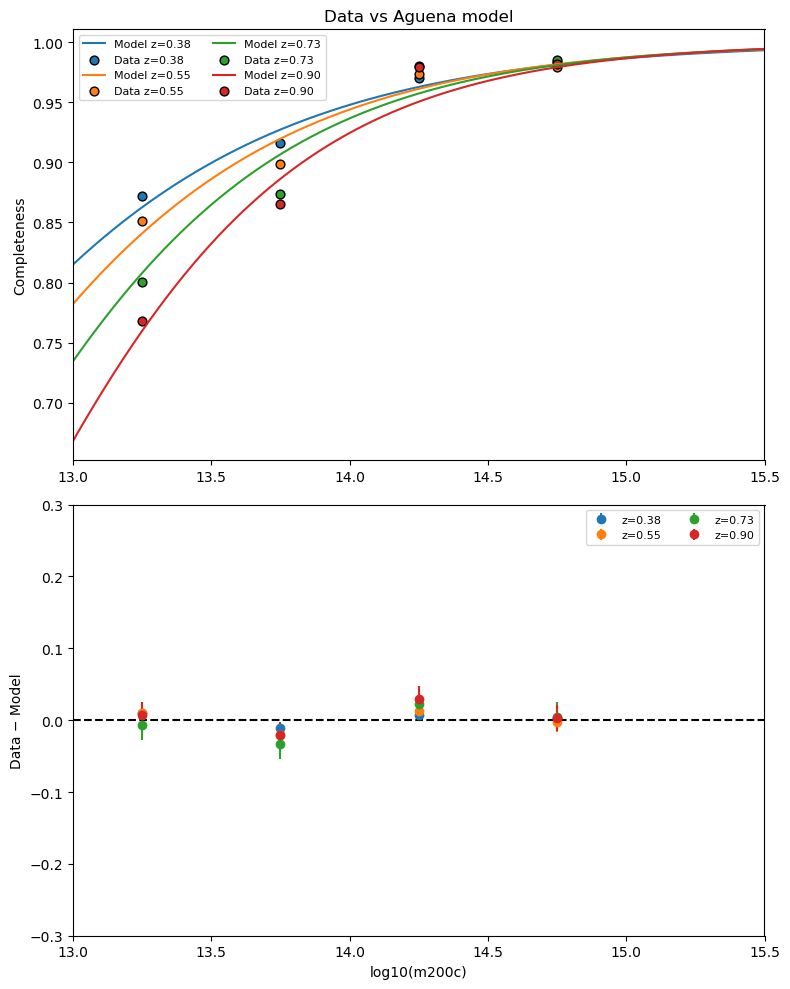

In [23]:
# Set Aguena parameters
completeness_aguena.parameters["a_n"]       = best_fit_c[0]
completeness_aguena.parameters["b_n"]       = best_fit_c[1]
completeness_aguena.parameters["a_logm_piv"] = best_fit_c[2]
completeness_aguena.parameters["b_logm_piv"] = best_fit_c[3]

log_mass_plot = np.linspace(13, 15.5, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    model_curve = completeness_aguena.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    plt.plot(log_mass_plot, model_curve, label=f"Model z={z:.2f}")
    plt.scatter(m_list, recovery_matrix[i, :], color='C'+str(i), edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Completeness")
plt.xlim(13,15.5)
plt.title("Data vs Aguena model")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    model_at_bins = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins

    # Empirical scatter per bin as error
    sigma = np.std(residual)

    plt.errorbar(m_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color='C'+str(i),
                 label=f"z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.xlim(13,15.5)
plt.ylim(-0.3, 0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


## Two-step fit

z bin 0 (z=0.375)  log10_mc=12.000   nc=0.642
z bin 1 (z=0.550)  log10_mc=12.041   nc=0.611
z bin 2 (z=0.725)  log10_mc=12.469   nc=0.747
z bin 3 (z=0.900)  log10_mc=12.629   nc=0.809


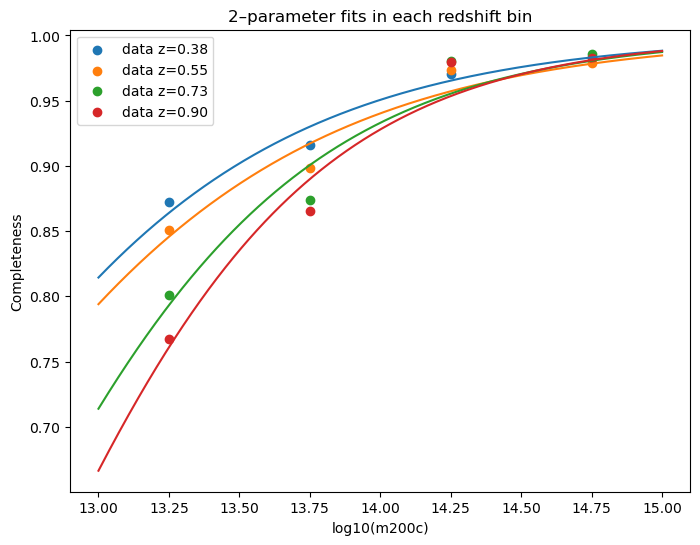


===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====
a_logm_piv = 10.1193
b_logm_piv = 1.3223
a_n        = 0.1062
b_n        = 0.3642


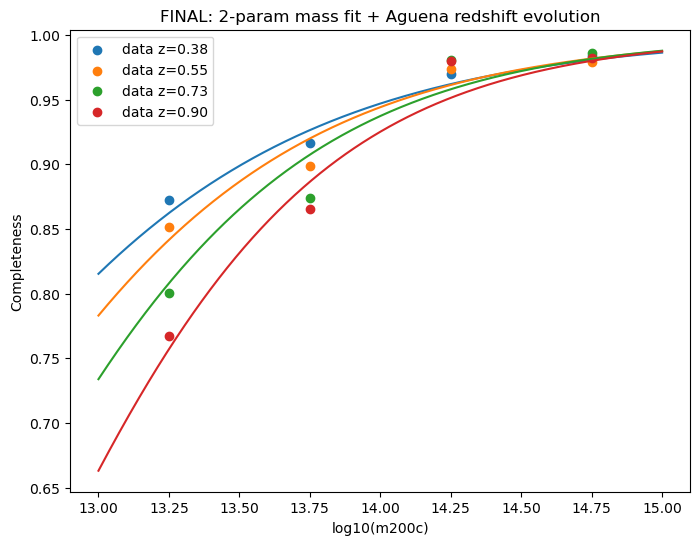

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################
# 1) Two–parameter completeness function in MASS ONLY
###############################################################

def f_completeness_param_2(log10m, log10_mc, nc):
    x = nc * np.log(10) * (log10m - log10_mc)
    return np.exp(x) / (1.0 + np.exp(x))


###############################################################
# 2) Extract binned data from info_comp
###############################################################

edges_z = info_comp["data"]["edges1"]
edges_m = info_comp["data"]["edges2"]
recovery_matrix = info_comp["data"]["recovery"]

# Bin centers
z_list = [(edges_z[i] + edges_z[i+1]) / 2.0 for i in range(len(edges_z)-1)]
m_list = [(edges_m[j] + edges_m[j+1]) / 2.0 for j in range(len(edges_m)-1)]

z_list = np.array(z_list)
m_list = np.array(m_list)

nbins_z = len(z_list)
nbins_m = len(m_list)

###############################################################
# 3) Fit (log10_mc , nc) independently in each redshift bin
###############################################################

arr_log10_mc = np.zeros(nbins_z)
arr_nc = np.zeros(nbins_z)

plt.figure(figsize=(8,6))

colors = ["black","red","blue","purple","green","brown"]

for i in range(nbins_z):

    ydata = recovery_matrix[i, :]

    # Curve fit in mass direction
    popt, pcov = curve_fit(
        f_completeness_param_2,
        xdata=m_list,
        ydata=ydata,
        p0=[13.5, 2.0],
        bounds=([12.0, 0.1], [15.0, 10.0])
    )

    arr_log10_mc[i] = popt[0]
    arr_nc[i]       = popt[1]

    print(f"z bin {i} (z={z_list[i]:.3f})  log10_mc={popt[0]:.3f}   nc={popt[1]:.3f}")

    # Plot data and 2-param fit
    x = np.linspace(13, 15, 1000)
    plt.scatter(m_list, ydata, label=f"data z={z_list[i]:.2f}")
    plt.plot(x,
             f_completeness_param_2(x, popt[0], popt[1]))
             #color=colors[i])

plt.xlabel("log10(m200c)")
plt.ylabel("Completeness")
plt.title("2–parameter fits in each redshift bin")
plt.legend()
plt.show()


###############################################################
# 4) Fit redshift evolution of these parameters
#    Aguena form:
#
#    log10_mc(z) = a_logm_piv + b_logm_piv * (1+z)
#    nc(z)       = a_n + b_n * (1+z)
###############################################################

def lin_z(z, a, b):
    return a + b*(1.0 + z)

# ---- Fit for log10_mc(z)
popt_mc, _ = curve_fit(lin_z, z_list, arr_log10_mc)

# ---- Fit for nc(z)
popt_nc, _ = curve_fit(lin_z, z_list, arr_nc)

a_logm_piv, b_logm_piv = popt_mc
a_n, b_n               = popt_nc

print("\n===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====")
print(f"a_logm_piv = {a_logm_piv:.4f}")
print(f"b_logm_piv = {b_logm_piv:.4f}")
print(f"a_n        = {a_n:.4f}")
print(f"b_n        = {b_n:.4f}")


###############################################################
# 5) Reconstruct FULL model using these 4 numbers
###############################################################

completeness_aguena_2fit = completeness_models.CompletenessAguena16()
completeness_aguena_2fit.parameters["a_n"] = a_n
completeness_aguena_2fit.parameters["b_n"] = b_n
completeness_aguena_2fit.parameters["a_logm_piv"] = a_logm_piv
completeness_aguena_2fit.parameters["b_logm_piv"] = b_logm_piv


###############################################################
# 6) Final comparison plot: DATA vs RECONSTRUCTED MODEL
###############################################################

plt.figure(figsize=(8,6))

log_mass_plot = np.linspace(13, 15, 1000)

for i,z in enumerate(z_list):

    plt.scatter(m_list,
                recovery_matrix[i,:],
                #color=colors[i],
                label=f"data z={z:.2f}")

    plt.plot(log_mass_plot,
             completeness_aguena_2fit.distribution(log_mass_plot, np.full_like(log_mass_plot, z)))
             #color=colors[i])

plt.xlabel("log10(m200c)")
plt.ylabel("Completeness")
plt.title("FINAL: 2-param mass fit + Aguena redshift evolution")
plt.legend()
plt.show()


### FInal comparison

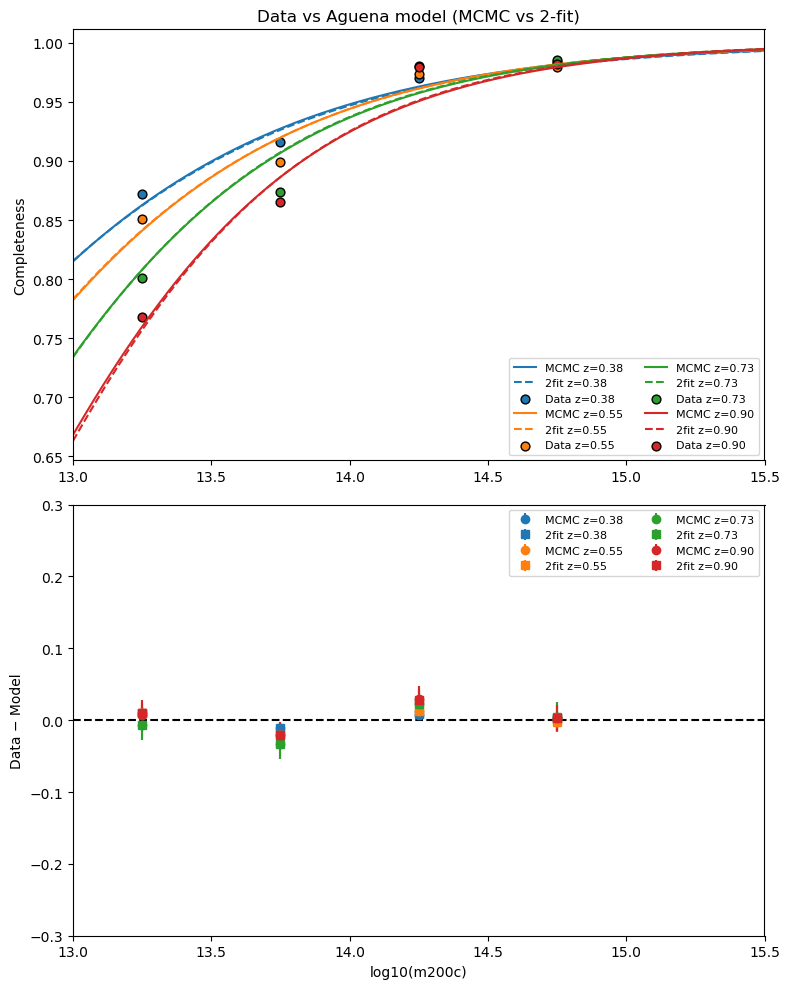

In [25]:

log_mass_plot = np.linspace(13, 15.5, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    # Model curves
    model_curve = completeness_aguena.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    model_curve_2fit = completeness_aguena_2fit.distribution(
        log_mass_plot,
        np.full_like(log_mass_plot, z)
    )
    
    # Plot curves with different line styles
    plt.plot(log_mass_plot, model_curve, color=f'C{i}', linestyle='-', label=f"MCMC z={z:.2f}")
    plt.plot(log_mass_plot, model_curve_2fit, color=f'C{i}', linestyle='--', label=f"2fit z={z:.2f}")
    
    # Scatter points
    plt.scatter(m_list, recovery_matrix[i, :], color=f'C{i}', edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Completeness")

plt.xlim(13,15.5)
plt.title("Data vs Aguena model (MCMC vs 2-fit)")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    # Compute residuals
    model_at_bins = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins
    
    model_at_bins_2fit = completeness_aguena_2fit.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    residual_2fit = recovery_matrix[i, :] - model_at_bins_2fit
    
    # Empirical scatter per bin
    sigma = np.std(residual)
    sigma_2fit = np.std(residual_2fit)
    
    # Plot residuals with different markers for clarity
    plt.errorbar(m_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color=f'C{i}',
                 label=f"MCMC z={z:.2f}")
    
    plt.errorbar(m_list, residual_2fit,
                 yerr=sigma_2fit,
                 fmt='s',   # square marker for 2-fit
                 color=f'C{i}',
                 label=f"2fit z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.xlim(13,15.5)
plt.ylim(-0.3, 0.3)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



In [26]:
import numpy as np

# Initialize arrays to store relative errors
rel_error_mcmc = []
rel_error_2fit = []

for i, z in enumerate(z_list):
    # model predictions at bin centers
    model_mcmc = completeness_aguena.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    model_2fit = completeness_aguena_2fit.distribution(
        m_list,
        np.full(len(m_list), z)
    )
    
    # Data
    data = recovery_matrix[i, :]
    
    # Avoid division by zero
    mask = data > 0
    
    rel_error_mcmc.extend(np.abs((model_mcmc[mask] - data[mask]) / data[mask]))
    rel_error_2fit.extend(np.abs((model_2fit[mask] - data[mask]) / data[mask]))

# Compute mean relative error
mean_rel_error_mcmc = np.mean(rel_error_mcmc)
mean_rel_error_2fit = np.mean(rel_error_2fit)

print(f"Mean relative error (MCMC fit): {mean_rel_error_mcmc:.3f}")
print(f"Mean relative error (2-param fit): {mean_rel_error_2fit:.3f}")


Mean relative error (MCMC fit): 0.014
Mean relative error (2-param fit): 0.014


## Purity

In [27]:
from crow import purity_models

purity_aguena = purity_models.PurityAguena16()
###################### MCMC ########################
def log_prior(theta):
    """Define the search space for a_n, b_n, a_logm_piv, b_logm_piv."""
    a_n, b_n, a_logm_piv, b_logm_piv = theta
    # Example bounds: adjust based on your specific Aguena16 priors
    if -5.0 < a_n < 20.0 and -5.0 < b_n < 25.0 and 0.0 < a_logm_piv < 26.0 and 0.0 < b_logm_piv < 20.0:
        return 0.0
    return -np.inf

def log_likelihood_gauss_pur(theta, log_mass_proxy, z, r, sigma):

    purity_aguena.parameters["a_n"] = theta[0]
    purity_aguena.parameters["b_n"] = theta[1]
    purity_aguena.parameters["a_logm_piv"] = theta[2]
    purity_aguena.parameters["b_logm_piv"] = theta[3]

    p = purity_aguena.distribution(log_mass_proxy, z)

    if np.any(np.isnan(p)):
        return -np.inf

    chi2 = (r - p)**2 / sigma**2

    return -0.5 * np.sum(chi2 + np.log(2*np.pi*sigma**2))

def log_probability_pur(theta, log_mass_proxy, z, r, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_gauss_pur(theta, log_mass_proxy, z, r, sigma)

0.050806418
[1.30103    1.60205999 1.90308999 2.30103   ]


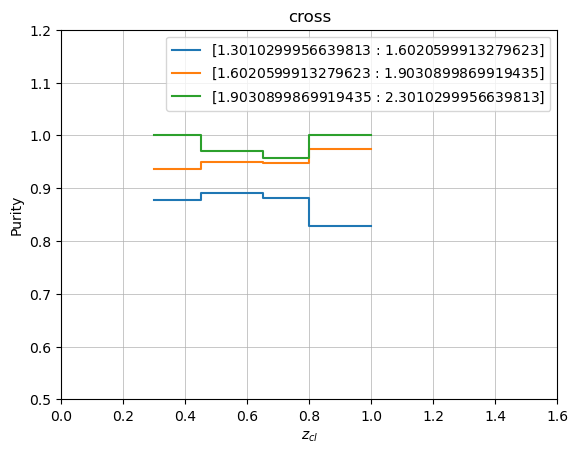

{'recovery': array([[0.87660668, 0.93670886, 1.        ],
       [0.89137591, 0.95012469, 0.96969697],
       [0.88156425, 0.94670051, 0.95774648],
       [0.82828556, 0.97503467, 1.        ]]), 'edges1': array([0.3 , 0.45, 0.65, 0.8 , 1.  ]), 'edges2': array([1.30103   , 1.60205999, 1.90308999, 2.30103   ]), 'matched': array([[ 682,  222,   42],
       [1354,  381,   64],
       [1578,  373,   68],
       [3063,  703,  115]]), 'counts': array([[ 778,  237,   42],
       [1519,  401,   66],
       [1790,  394,   71],
       [3698,  721,  115]])}


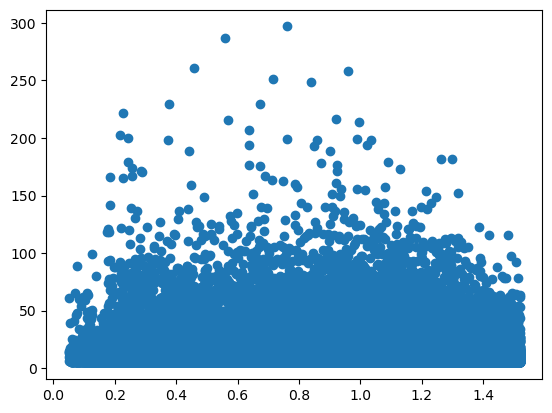

In [28]:
redshift_cluster_col = "zp"
print(np.min(c2['zp']))
richness_cluster_col = "log_n200"
#rbins = np.linspace(np.log10(20), np.log10(200), 4)
rbins = np.log10([20, 40, 80, 200])
#zbins = np.array([0.3, 0.5, 0.75, 1.0])
#mbins = np.logspace(14, 15, 5)
print(rbins)
fig = plt.figure()
info_pur = r_cf.plot(c2, col1=redshift_cluster_col, col2=richness_cluster_col, bins1=zbins, bins2=rbins, matching_type=matching_selected)
info_pur['ax'].set_xlabel('$z_{cl}$')
info_pur['ax'].set_ylabel('Purity') 
info_pur['ax'].set_ylim(0.5,1.2)
info_pur['ax'].set_xlim(0.0,1.6) 
info_pur['ax'].set_title(matching_selected)
plt.show(fig)
plt.close(fig)
print(info_pur["data"])
plt.scatter(c2['zp'], c2['n200'])

In [29]:
edges_z = info_pur["data"]["edges1"]
edges_p = info_pur["data"]["edges2"]
recovery_matrix = info_pur["data"]["recovery"]
n_match = info_pur["data"]["matched"]
n_total = info_pur["data"]["counts"]


z_list = []
for i in range(len(edges_z) - 1):
    z_list.append((edges_z[i] + edges_z[i+1]) / 2.0)

proxy_list = []
for j in range(len(edges_p) - 1):
    proxy_list.append((edges_p[j] + edges_p[j+1]) / 2.0)
z_list = np.array(z_list)
proxy_list = np.array(proxy_list)
mcmc_z = []
mcmc_p = []
mcmc_rec = []
mcmc_n_total = []
mcmc_n_match = []
for i in range(len(z_list)):        # Loop over redshift bins
    for j in range(len(proxy_list)):    # Loop over mass bins
        mcmc_z.append(z_list[i])
        mcmc_p.append(proxy_list[j])
        mcmc_rec.append(recovery_matrix[i, j])
        mcmc_n_total.append(n_total[i, j])
        mcmc_n_match.append(n_match[i, j])
# Convert to numpy arrays for speed in the likelihood function
sigma_mcmc = np.std(mcmc_rec)
mcmc_z = np.array(mcmc_z)
mcmc_p = np.array(mcmc_p)
mcmc_rec = np.array(mcmc_rec)
mcmc_n_total = np.array(mcmc_n_total)
mcmc_n_match = np.array(mcmc_n_match)

print(f"Total data points for MCMC: {len(mcmc_rec)}")
print(mcmc_rec, mcmc_z, mcmc_p, mcmc_n_total, mcmc_n_match, sigma_mcmc)

Total data points for MCMC: 12
[0.87660668 0.93670886 1.         0.89137591 0.95012469 0.96969697
 0.88156425 0.94670051 0.95774648 0.82828556 0.97503467 1.        ] [0.375 0.375 0.375 0.55  0.55  0.55  0.725 0.725 0.725 0.9   0.9   0.9  ] [1.45154499 1.75257499 2.10205999 1.45154499 1.75257499 2.10205999
 1.45154499 1.75257499 2.10205999 1.45154499 1.75257499 2.10205999] [ 778  237   42 1519  401   66 1790  394   71 3698  721  115] [ 682  222   42 1354  381   64 1578  373   68 3063  703  115] 0.05139363658648232


In [30]:
best_fit_p = []
n_params = 4
n_walkers = 50
n_steps = 100000

# Initial guess (center of the ball)
initial_guess = np.array([3.9, -0.3, 1.31, 0.40]) 
pos = initial_guess + 1e-4 * np.random.randn(n_walkers, n_params)

sampler = emcee.EnsembleSampler(
    n_walkers, n_params, log_probability_pur,
    args=(mcmc_p, mcmc_z, mcmc_rec, sigma_mcmc)
)

print("Running MCMC...")
sampler.run_mcmc(pos, n_steps, progress=True)
# Discard first 500 steps and flatten
flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)


flat_samples = sampler.get_chain(discard=20000, thin=15, flat=True)
flat_log_prob = sampler.get_log_prob(discard=20000, thin=15, flat=True)

# Index of maximum posterior sample
max_ind = np.argmax(flat_log_prob)

map_params = flat_samples[max_ind]

labels_p = ["a_n", "b_n", "a_logm_piv", "b_logm_piv"]

print("MAP (maximum posterior) parameters:")
for label, val in zip(labels_p, map_params):
    best_fit_p.append(val)
    print(f"{label}: {val:.6f}")

Running MCMC...


100%|██████████| 100000/100000 [01:17<00:00, 1292.10it/s]

MAP (maximum posterior) parameters:
a_n: -0.817117
b_n: 1.573679
a_logm_piv: 0.007941
b_logm_piv: 0.587819


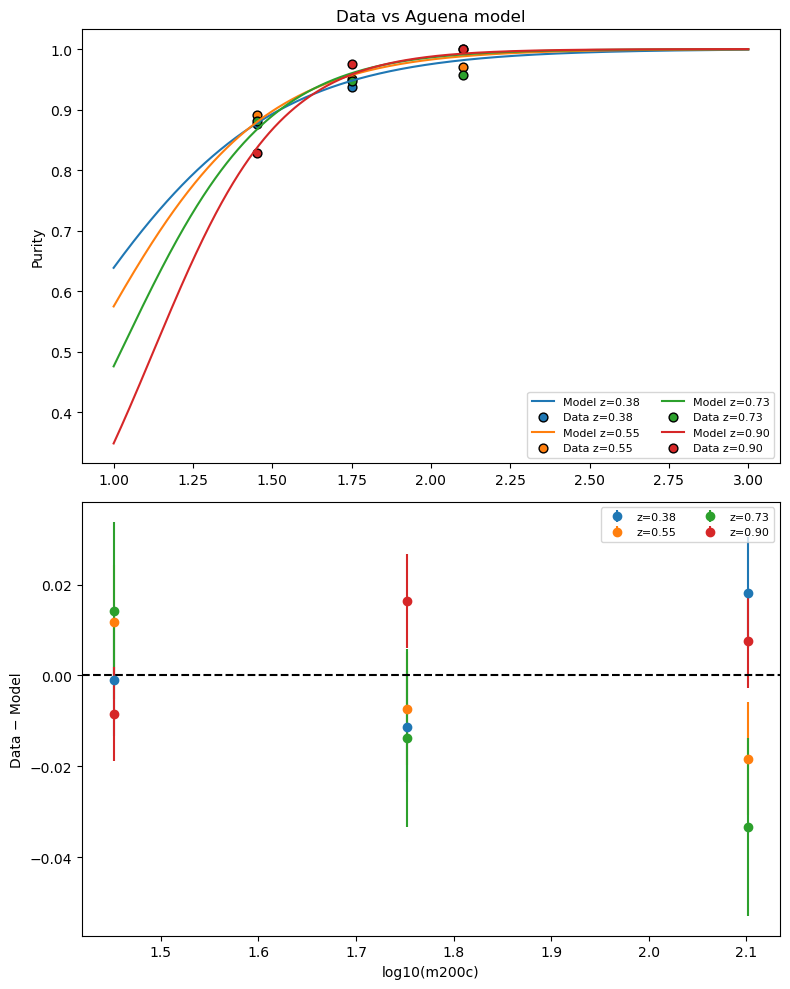

In [31]:
# Set Aguena parameters
purity_aguena.parameters["a_n"]       = best_fit_p[0]
purity_aguena.parameters["b_n"]       = best_fit_p[1]
purity_aguena.parameters["a_logm_piv"] = best_fit_p[2]
purity_aguena.parameters["b_logm_piv"] = best_fit_p[3]

log_proxy_plot = np.linspace(1, 3, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    model_curve = purity_aguena.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    plt.plot(log_proxy_plot, model_curve, label=f"Model z={z:.2f}")
    plt.scatter(proxy_list, recovery_matrix[i, :], color='C'+str(i), edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Purity")
plt.title("Data vs Aguena model")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    model_at_bins = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins

    # Empirical scatter per bin as error
    sigma = np.std(residual)

    plt.errorbar(proxy_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color='C'+str(i),
                 label=f"z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


## 2STEP approach

z bin 0 (z=0.375)  log10_mc=1.000   nc=1.800
[0.87660668 0.93670886 1.        ]
z bin 1 (z=0.550)  log10_mc=1.000   nc=1.912
[0.89137591 0.95012469 0.96969697]
z bin 2 (z=0.725)  log10_mc=1.000   nc=1.811
[0.88156425 0.94670051 0.95774648]
z bin 3 (z=0.900)  log10_mc=1.227   nc=3.043
[0.82828556 0.97503467 1.        ]


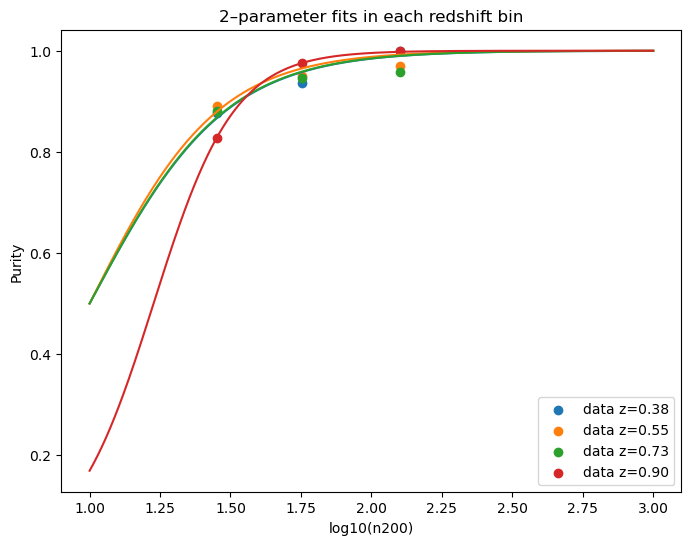


===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====
a_logm_piv = 0.4195
b_logm_piv = 0.3892
a_n        = -1.2550
b_n        = 2.0741


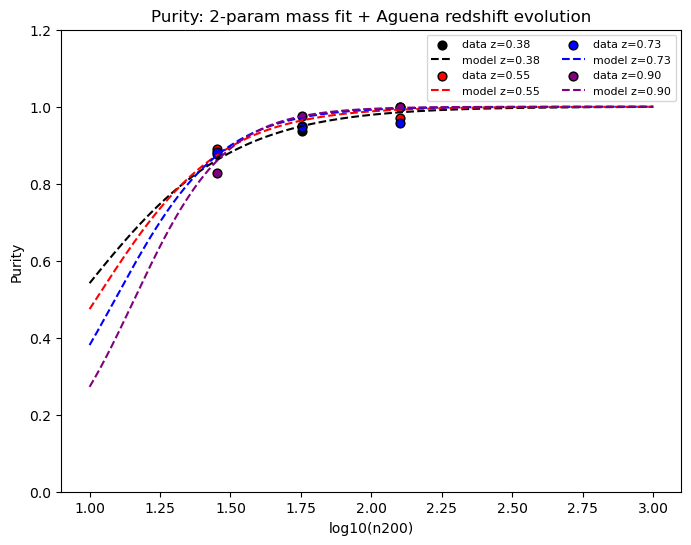

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################
# 1) Two–parameter completeness function in MASS ONLY
###############################################################

def f_purity_param_2(log10m, log10_mc, nc):
    x = nc * np.log(10) * (log10m - log10_mc)
    return np.exp(x) / (1.0 + np.exp(x))


###############################################################
# 2) Extract binned data from info_comp
###############################################################

edges_z = info_pur["data"]["edges1"]
edges_p = info_pur["data"]["edges2"]
recovery_matrix = info_pur["data"]["recovery"]

# Bin centers
z_list = [(edges_z[i] + edges_z[i+1]) / 2.0 for i in range(len(edges_z)-1)]
proxy_list = [(edges_p[j] + edges_p[j+1]) / 2.0 for j in range(len(edges_p)-1)]

z_list = np.array(z_list)
proxy_list = np.array(proxy_list)

nbins_z = len(z_list)
nbins_proxy = len(proxy_list)

###############################################################
# 3) Fit (log10_mc , nc) independently in each redshift bin
###############################################################

arr_log10_mc = np.zeros(nbins_z)
arr_nc = np.zeros(nbins_z)

plt.figure(figsize=(8,6))

colors = ["black","red","blue","purple","green","brown"]

for i in range(nbins_z):

    ydata = recovery_matrix[i, :]

    # Curve fit in mass direction
    popt, pcov = curve_fit(
        f_purity_param_2,
        xdata=proxy_list,
        ydata=ydata,
        p0=[1.7, 1.0],
        bounds=([1.0, 0.1], [3.0, 10.0])
    )

    arr_log10_mc[i] = popt[0]
    arr_nc[i]       = popt[1]

    print(f"z bin {i} (z={z_list[i]:.3f})  log10_mc={popt[0]:.3f}   nc={popt[1]:.3f}")

    # Plot data and 2-param fit
    x = np.linspace(1, 3, 1000)
    plt.scatter(proxy_list, ydata, label=f"data z={z_list[i]:.2f}")
    plt.plot(x,
             f_purity_param_2(x, popt[0], popt[1]))
             #color=colors[i])
    print(ydata)
plt.xlabel("log10(n200)")
plt.ylabel("Purity")
plt.title("2–parameter fits in each redshift bin")
plt.legend()
plt.show()


###############################################################
# 4) Fit redshift evolution of these parameters
#    Aguena form:
#
#    log10_mc(z) = a_logm_piv + b_logm_piv * (1+z)
#    nc(z)       = a_n + b_n * (1+z)
###############################################################

def lin_z(z, a, b):
    return a + b*(1.0 + z)

# ---- Fit for log10_mc(z)
popt_mc, _ = curve_fit(lin_z, z_list, arr_log10_mc)

# ---- Fit for nc(z)
popt_nc, _ = curve_fit(lin_z, z_list, arr_nc)

a_logm_piv, b_logm_piv = popt_mc
a_n, b_n               = popt_nc

print("\n===== FINAL AGUENA–STYLE PARAMETERS FROM 2-PARAM FIT =====")
print(f"a_logm_piv = {a_logm_piv:.4f}")
print(f"b_logm_piv = {b_logm_piv:.4f}")
print(f"a_n        = {a_n:.4f}")
print(f"b_n        = {b_n:.4f}")


###############################################################
# 5) Reconstruct FULL model using these 4 numbers
###############################################################

purity_aguena_2fit = purity_models.PurityAguena16()
purity_aguena_2fit.parameters["a_n"] = a_n
purity_aguena_2fit.parameters["b_n"] = b_n
purity_aguena_2fit.parameters["a_logm_piv"] = a_logm_piv
purity_aguena_2fit.parameters["b_logm_piv"] = b_logm_piv


###############################################################
# 6) Final comparison plot: DATA vs RECONSTRUCTED MODEL
###############################################################
plt.figure(figsize=(8,6))

log_proxy_plot = np.linspace(1, 3, 1000)
colors = ["black","red","blue","purple","green","brown"]

for i,z in enumerate(z_list):

    # Scatter of binned purity data
    plt.scatter(proxy_list,
                recovery_matrix[i,:],
                color=colors[i % len(colors)],
                edgecolor='k',
                s=40,
                label=f"data z={z:.2f}")

    # Reconstructed 2-param + Aguena model
    plt.plot(log_proxy_plot,
             purity_aguena_2fit.distribution(log_proxy_plot, np.full_like(log_proxy_plot, z)),
             color=colors[i % len(colors)],
             linestyle='--',
             label=f"model z={z:.2f}")

plt.xlabel("log10(n200)")
plt.ylabel("Purity")
plt.title("Purity: 2-param mass fit + Aguena redshift evolution")
plt.ylim(0, 1.2)
plt.legend(fontsize=8, ncol=2)
plt.show()



### FInal comparaison

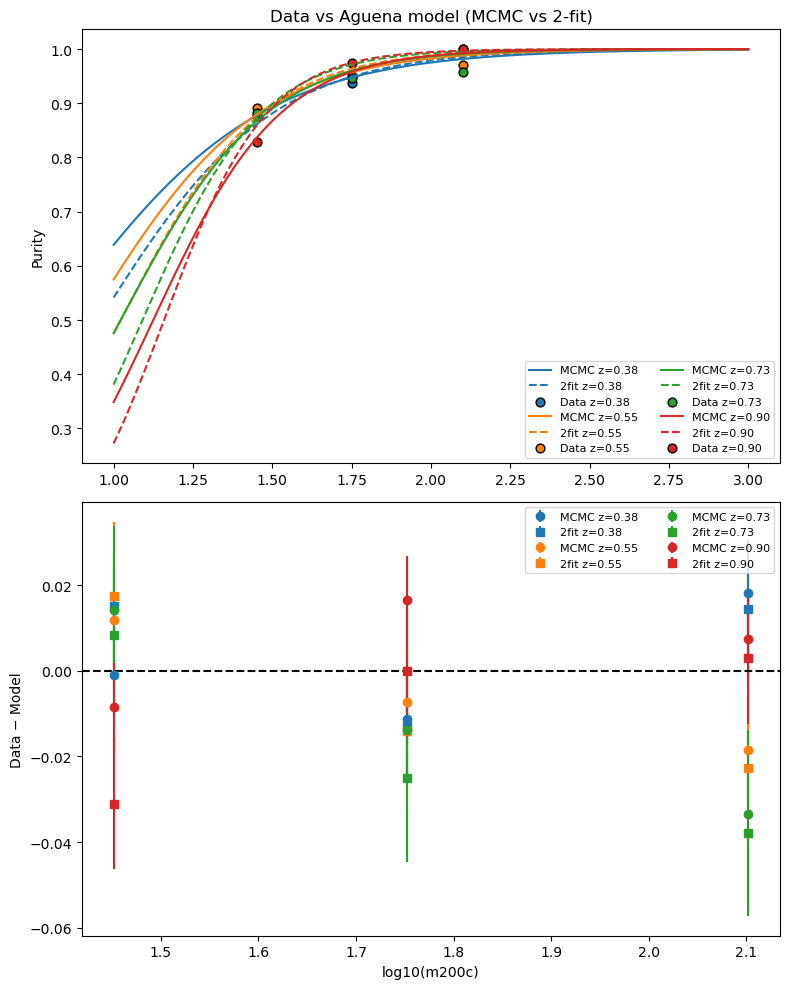

In [33]:

log_proxy_plot = np.linspace(1, 3, 1000)

# Create figure with 2 subplots
plt.figure(figsize=(8,10))

# ===== TOP: data vs model =====
plt.subplot(2,1,1)
for i, z in enumerate(z_list):
    # Model curves
    model_curve = purity_aguena.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    model_curve_2fit = purity_aguena_2fit.distribution(
        log_proxy_plot,
        np.full_like(log_proxy_plot, z)
    )
    
    # Plot curves with different line styles
    plt.plot(log_proxy_plot, model_curve, color=f'C{i}', linestyle='-', label=f"MCMC z={z:.2f}")
    plt.plot(log_proxy_plot, model_curve_2fit, color=f'C{i}', linestyle='--', label=f"2fit z={z:.2f}")
    
    # Scatter points
    plt.scatter(proxy_list, recovery_matrix[i, :], color=f'C{i}', edgecolor='k', s=40, label=f"Data z={z:.2f}")

plt.ylabel("Purity")

plt.title("Data vs Aguena model (MCMC vs 2-fit)")
plt.legend(fontsize=8, ncol=2)

# ===== BOTTOM: residuals =====
plt.subplot(2,1,2)
for i, z in enumerate(z_list):
    # Compute residuals
    model_at_bins = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual = recovery_matrix[i, :] - model_at_bins
    
    model_at_bins_2fit = purity_aguena_2fit.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    residual_2fit = recovery_matrix[i, :] - model_at_bins_2fit
    
    # Empirical scatter per bin
    sigma = np.std(residual)
    sigma_2fit = np.std(residual_2fit)
    
    # Plot residuals with different markers for clarity
    plt.errorbar(proxy_list, residual,
                 yerr=sigma,
                 fmt='o',
                 color=f'C{i}',
                 label=f"MCMC z={z:.2f}")
    
    plt.errorbar(proxy_list, residual_2fit,
                 yerr=sigma_2fit,
                 fmt='s',   # square marker for 2-fit
                 color=f'C{i}',
                 label=f"2fit z={z:.2f}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel("log10(m200c)")
plt.ylabel("Data − Model")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()



In [34]:
import numpy as np

# Initialize arrays to store relative errors
rel_error_mcmc = []
rel_error_2fit = []

for i, z in enumerate(z_list):
    # model predictions at bin centers
    model_mcmc = purity_aguena.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    model_2fit = purity_aguena_2fit.distribution(
        proxy_list,
        np.full(len(proxy_list), z)
    )
    
    # Data
    data = recovery_matrix[i, :]
    
    # Avoid division by zero
    mask = data > 0
    
    rel_error_mcmc.extend(np.abs((model_mcmc[mask] - data[mask]) / data[mask]))
    rel_error_2fit.extend(np.abs((model_2fit[mask] - data[mask]) / data[mask]))

# Compute mean relative error
mean_rel_error_mcmc = np.mean(rel_error_mcmc)
mean_rel_error_2fit = np.mean(rel_error_2fit)

print(f"Mean relative error (MCMC fit): {mean_rel_error_mcmc:.3f}")
print(f"Mean relative error (2-param fit): {mean_rel_error_2fit:.3f}")


Mean relative error (MCMC fit): 0.014
Mean relative error (2-param fit): 0.018


In [35]:
## FInal prediction

[(np.float64(0.3), np.float64(0.45)), (np.float64(0.45), np.float64(0.65)), (np.float64(0.65), np.float64(0.8)), (np.float64(0.8), np.float64(1.0))]


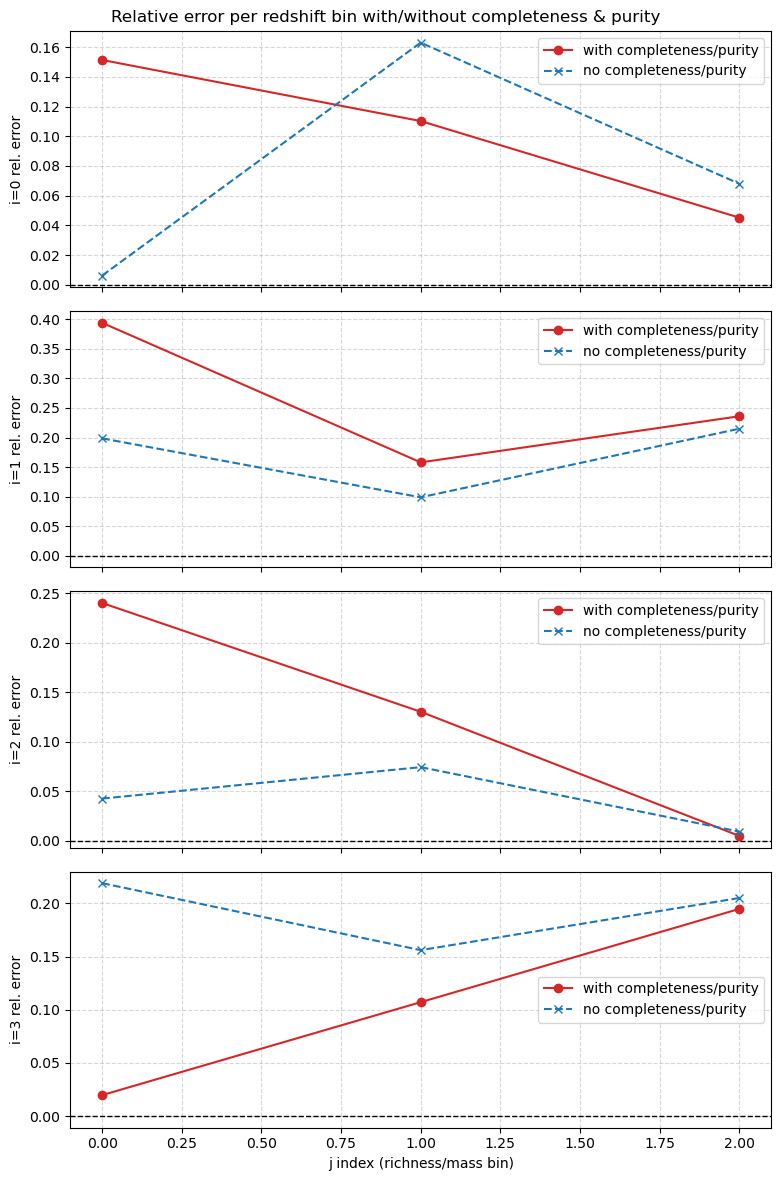

In [36]:
# --- Fiducial grid with completeness & purity ---
recipe_grid_comp = GridBinnedClusterRecipe(
    mass_interval=mass_interval,
    cluster_theory=cl_abundandce,
    redshift_distribution=redshift_distribution,
    mass_distribution=mass_richness_unb,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    purity=purity_aguena,
    completeness=None#completeness_aguena
)
recipe_grid_comp.setup()
print(z_bins_tuple)
grid_comp_vals  = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_comp_vals[i,j] = recipe_grid_comp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)

rel_error_matrix = abs(1 - grid_comp_vals / counts)

# --- Grid WITHOUT completeness & purity ---
recipe_grid_nocomp = GridBinnedClusterRecipe(
    mass_interval=mass_interval,
    cluster_theory=cl_abundandce,
    redshift_distribution=redshift_distribution,
    mass_distribution=mass_richness_unb,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    purity=None,
    completeness=None
)
recipe_grid_nocomp.setup()

grid_nocomp_vals = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_nocomp_vals[i,j] = recipe_grid_nocomp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)

rel_error_matrix_nocomp = abs(1 - grid_nocomp_vals / counts)

# --- Plot both relative errors ---
n_i, n_j = rel_error_matrix.shape

fig, axes = plt.subplots(n_i, 1, figsize=(8, 3*n_i), sharex=True)

if n_i == 1:
    axes = [axes]  # make iterable if only 1 subplot

for i in range(n_i):
    axes[i].plot(np.arange(n_j), rel_error_matrix[i], marker='o', linestyle='-', color='tab:red', label="with completeness/purity")
    axes[i].plot(np.arange(n_j), rel_error_matrix_nocomp[i], marker='x', linestyle='--', color='tab:blue', label="no completeness/purity")
    axes[i].axhline(0, color='k', linestyle='--', lw=1)
    axes[i].set_ylabel(f"i={i} rel. error")
    axes[i].grid(True, ls="--", alpha=0.5)
    axes[i].legend()

axes[-1].set_xlabel("j index (richness/mass bin)")
plt.suptitle("Relative error per redshift bin with/without completeness & purity")
plt.tight_layout()
plt.show()


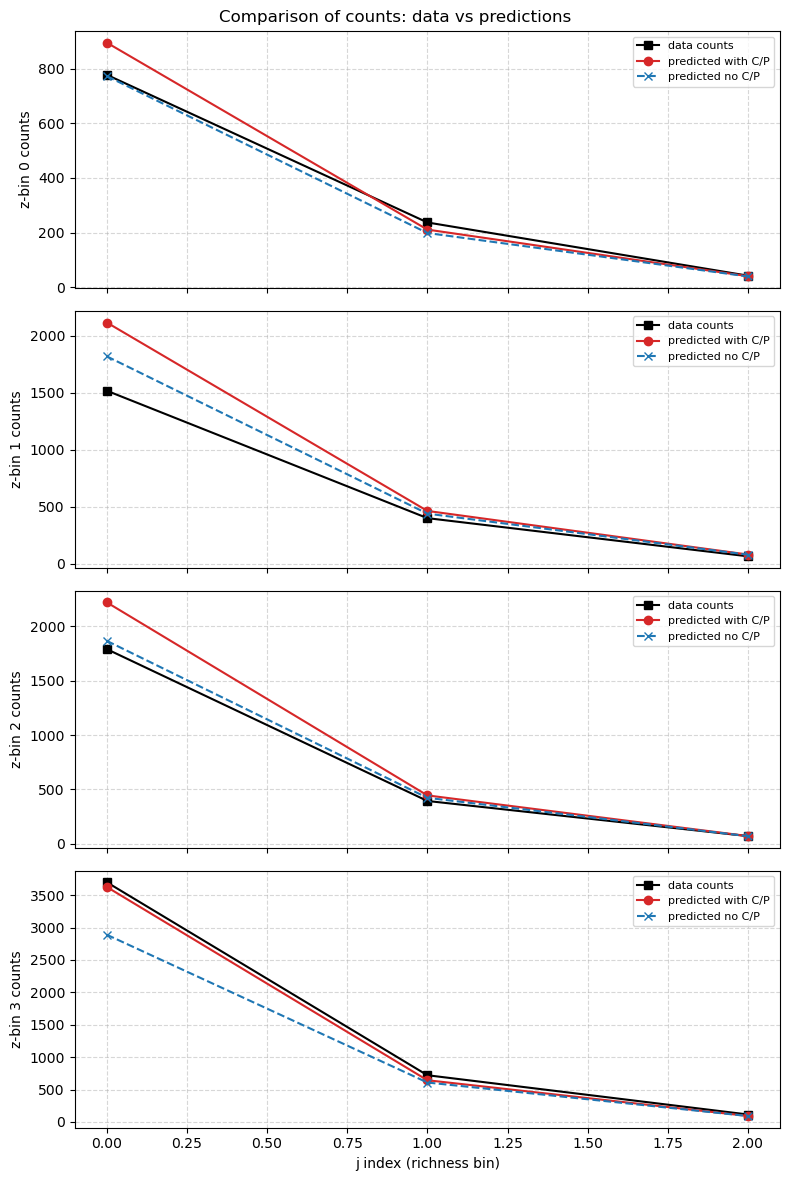

In [37]:
fig, axes = plt.subplots(n_i, 1, figsize=(8, 3*n_i), sharex=True)

if n_i == 1:
    axes = [axes]

for i in range(n_i):

    axes[i].plot(np.arange(n_j), counts[i],
                 marker='s', linestyle='-',
                 color='black',
                 label="data counts")

    axes[i].plot(np.arange(n_j), grid_comp_vals[i],
                 marker='o', linestyle='-',
                 color='tab:red',
                 label="predicted with C/P")

    axes[i].plot(np.arange(n_j), grid_nocomp_vals[i],
                 marker='x', linestyle='--',
                 color='tab:blue',
                 label="predicted no C/P")

    axes[i].set_ylabel(f"z-bin {i} counts")
    axes[i].grid(True, ls="--", alpha=0.5)
    axes[i].legend(fontsize=8)

axes[-1].set_xlabel("j index (richness bin)")
plt.suptitle("Comparison of counts: data vs predictions")
plt.tight_layout()

plt.show()

[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]] [[ 841.42399724  202.54459499   39.07224689]
 [1962.04220105  442.83763323   79.19915254]
 [2013.61729549  419.85291834   68.8433971 ]
 [3171.72875767  595.28992928   88.43666516]]
[[ 0.07537698 -0.17011269 -0.07493178]
 [ 0.22580666  0.09447624  0.16665775]
 [ 0.11105253  0.06157613 -0.03132621]
 [-0.16592568 -0.21117453 -0.30036563]]


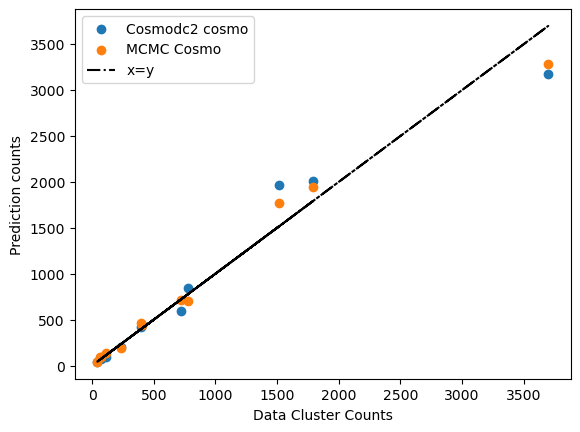

In [38]:
cosmo_mcmc = ccl.Cosmology(
    Omega_c=0.156,
    Omega_b=0.02258 / 0.71**2,
    h=0.71,
    n_s=0.963,
    sigma8=0.88,#0.8,
    w0=-1.0,
    wa=0.0,
    transfer_function="boltzmann_camb"
)



cosmo = ccl.Cosmology(
    Omega_c=  0.1109 / 0.71**2,
    Omega_b=0.02258 / 0.71**2,
    h=0.71,
    n_s=0.963,
    sigma8=0.8,
    w0=-1.0,
    wa=0.0,
    transfer_function="boltzmann_camb"
)

cl_abundandce = ClusterAbundance(cosmo, hmf)


recipe_grid_comp = GridBinnedClusterRecipe(
    mass_interval=mass_interval,
    cluster_theory=cl_abundandce,
    redshift_distribution=redshift_distribution,
    mass_distribution=mass_richness_unb,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    purity=purity_aguena,
    completeness=completeness_aguena
)
recipe_grid_comp.setup()

grid_comp_vals  = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_comp_vals[i,j] = recipe_grid_comp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)

rel_error_matrix = abs(1 - grid_comp_vals / counts)


recipe_grid_comp.cluster_theory.cosmo = cosmo_mcmc
recipe_grid_comp.setup()

exact_t0 = time.time()
grid_comp_mcmc = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_comp_mcmc[i,j] = recipe_grid_comp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)
        



print(counts, grid_comp_vals)
print(1.0 - counts / grid_comp_vals)

plt.scatter(counts, grid_comp_vals, label="Cosmodc2 cosmo")
plt.scatter(counts, grid_comp_mcmc, label="MCMC Cosmo")
plt.plot(counts.flatten(), np.repeat(counts.flatten(), 1.0), '-.', label="x=y", color='black')
plt.xlabel("Data Cluster Counts")
plt.ylabel("Prediction counts")
plt.legend()

[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]] [[ 841.42399724  202.54459499   39.07224689]
 [1962.04220105  442.83763323   79.19915254]
 [2013.61729549  419.85291834   68.8433971 ]
 [3171.72875767  595.28992928   88.43666516]]
[[ 0.07537698 -0.17011269 -0.07493178]
 [ 0.22580666  0.09447624  0.16665775]
 [ 0.11105253  0.06157613 -0.03132621]
 [-0.16592568 -0.21117453 -0.30036563]]


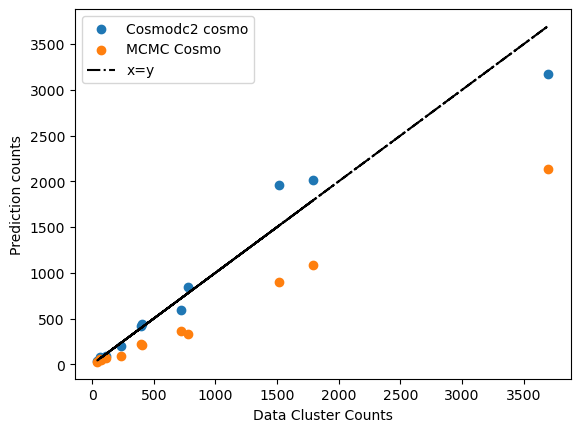

In [39]:
cosmo = ccl.Cosmology(
    Omega_c=  0.1109 / 0.71**2,
    Omega_b=0.02258 / 0.71**2,
    h=0.71,
    n_s=0.963,
    sigma8=0.8,
    w0=-1.0,
    wa=0.0,
    transfer_function="boltzmann_camb"
)

cl_abundandce = ClusterAbundance(cosmo, hmf)


recipe_grid_comp = GridBinnedClusterRecipe(
    mass_interval=mass_interval,
    cluster_theory=cl_abundandce,
    redshift_distribution=redshift_distribution,
    mass_distribution=mass_richness_unb,
    proxy_grid_size=proxy_grid_size,
    redshift_grid_size=redshift_grid_size,
    mass_grid_size=mass_grid_size,
    purity=purity_aguena,
    completeness=completeness_aguena
)
recipe_grid_comp.setup()
recipe_grid_comp.mass_distribution.parameters["mu0"] = best_fit[0]
recipe_grid_comp.mass_distribution.parameters["mu1"] = best_fit[1]
recipe_grid_comp.mass_distribution.parameters["mu2"] = best_fit[2]
recipe_grid_comp.mass_distribution.parameters["sigma0"] = best_fit[3]
recipe_grid_comp.mass_distribution.parameters["sigma1"] = best_fit[4]
recipe_grid_comp.mass_distribution.parameters["sigma2"] = best_fit[5]
grid_comp_vals  = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_comp_vals[i,j] = recipe_grid_comp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)

rel_error_matrix = abs(1 - grid_comp_vals / counts)


recipe_grid_comp.cluster_theory.cosmo = cosmo_mcmc
recipe_grid_comp.setup()

exact_t0 = time.time()
recipe_grid_comp.mass_distribution.parameters["mu0"] = 3.14
recipe_grid_comp.mass_distribution.parameters["mu1"] = 0.75
recipe_grid_comp.mass_distribution.parameters["mu2"] = 2.20
recipe_grid_comp.mass_distribution.parameters["sigma0"] = 0.70
recipe_grid_comp.mass_distribution.parameters["sigma1"] = 0.16
recipe_grid_comp.mass_distribution.parameters["sigma2"] = -1.1

grid_comp_mcmc = np.zeros((len(z_bins)-1, len(richness_bins_linear)-1))
for i, zb in enumerate(z_bins_tuple):
    for j, pb in enumerate(proxy_bins):
        grid_comp_mcmc[i,j] = recipe_grid_comp.evaluate_theory_prediction_counts(np.array(zb), np.array(pb), sky_area)
        



print(counts, grid_comp_vals)
print(1.0 - counts / grid_comp_vals)

plt.scatter(counts, grid_comp_vals, label="Cosmodc2 cosmo")
plt.scatter(counts, grid_comp_mcmc, label="MCMC Cosmo")
plt.plot(counts.flatten(), np.repeat(counts.flatten(), 1.0), '-.', label="x=y", color='black')
plt.xlabel("Data Cluster Counts")
plt.ylabel("Prediction counts")
plt.legend()

recipe_grid_comp.mass_distribution.parameters["mu0"] = best_fit[0]
recipe_grid_comp.mass_distribution.parameters["mu1"] = best_fit[1]
recipe_grid_comp.mass_distribution.parameters["mu2"] = best_fit[2]
recipe_grid_comp.mass_distribution.parameters["sigma0"] = best_fit[3]
recipe_grid_comp.mass_distribution.parameters["sigma1"] = best_fit[4]
recipe_grid_comp.mass_distribution.parameters["sigma2"] = best_fit[5]

## Fitting parameters with curve fit 

In [40]:
from scipy.optimize import minimize
def fit_func_counts(dummy_x, mu0, mu1, mu2, sigma0, sigma1, sigma2):
    """
    Returns flattened (Nz * Nr) model prediction
    """

    # --- set parameters ---
    recipe_grid_comp.mass_distribution.parameters["mu0"], recipe_grid_comp.mass_distribution.parameters["mu1"], recipe_grid_comp.mass_distribution.parameters["mu2"] = mu0, mu1, mu2
    recipe_grid_comp.mass_distribution.parameters["sigma0"], recipe_grid_comp.mass_distribution.parameters["sigma1"], recipe_grid_comp.mass_distribution.parameters["sigma2"] = sigma0, sigma1, sigma2

    recipe_grid_comp.setup()

    # --- compute full 2D grid ---
    grid_comp_vals = np.zeros((Nz, Nr))

    for i, zb in enumerate(z_bins_tuple):
        for j, pb in enumerate(proxy_bins):

            grid_comp_vals[i, j] = \
                recipe_grid_comp.evaluate_theory_prediction_counts(
                    np.array(zb),
                    np.array(pb),
                    sky_area
                )
    return grid_comp_vals.ravel()   # CRITICAL
Nz = len(z_bins_tuple)
Nr = len(proxy_bins)
x_dummy = np.zeros(Nz * Nr)

ydata = recovery_matrix
ydata = ydata.ravel()
print(ydata.ravel)
# Curve fit in mass direction
p0 = np.array([3.5, 0.90, 1.0, 0.5, 0.01, 0.02])

lower = p0 - 3.0
upper = p0 + 3.0

# popt, pcov = curve_fit(
#     fit_func_counts,
#     xdata=x_dummy,
#     ydata=ydata,
#     p0=p0,
#     bounds=(lower, upper),
#     max_nfev=5000 
# )

def poisson_nll(theta):
    mu = fit_func_counts(x_dummy, *theta)
    mu = np.clip(mu, 1e-10, None)

    term = mu - ydata
    mask = ydata > 0
    term[mask] += ydata[mask] * np.log(ydata[mask] / mu[mask])

    return 2 * np.sum(term)

res = minimize(
    poisson_nll,
    p0,
    bounds=list(zip(lower, upper)),
    method="L-BFGS-B"
)

print("success:", res.success)
print("message:", res.message)
print("best fit:", res.x)



<built-in method ravel of numpy.ndarray object at 0x7fd14b81e4f0>
success: True
message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
best fit: [ 0.5         1.07918606 -2.          0.29713178  0.43133694  1.53274633]


In [41]:
print(popt)

[1.22701595 3.04306368]



Testing binning:
zbins  = [0.3 0.4 0.6 0.8 1. ]
rbins  = [ 20  40  80 200]
---------------------------------------------------
z[0] r[0] : N=490  matched=431  purity=0.880  --> OK
z[0] r[1] : N=147  matched=135  purity=0.918  --> OK
z[0] r[2] : N= 27  matched= 27  purity=1.000  --> OK | purity=0/1
z[1] r[0] : N=1350  matched=1199  purity=0.888  --> OK
z[1] r[1] : N=374  matched=354  purity=0.947  --> OK
z[1] r[2] : N= 63  matched= 61  purity=0.968  --> OK
z[2] r[0] : N=2247  matched=1975  purity=0.879  --> OK
z[2] r[1] : N=511  matched=487  purity=0.953  --> OK
z[2] r[2] : N= 89  matched= 86  purity=0.966  --> OK
z[3] r[0] : N=3698  matched=3030  purity=0.819  --> OK
z[3] r[1] : N=721  matched=703  purity=0.975  --> OK
z[3] r[2] : N=115  matched=115  purity=1.000  --> OK | purity=0/1

Summary diagnostics:
Min clusters in any bin: 27
Bins with <20 clusters : 0
Mean purity per z-bin  : [0.93265306 0.93430873 0.93275837 0.9314655 ]

Testing binning:
zbins  = [0.2  0.45 0.7  1.  ]
rbins  

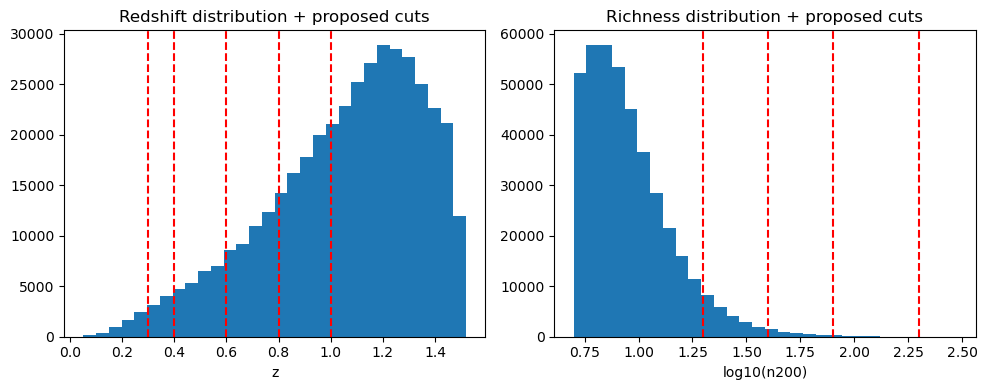

In [42]:
def evaluate_binning(c2, t_cl_halo_match, zbins, rbins, min_per_bin=20):

    # ----- Counts in the FULL cluster catalog -----
    H_full, _, _ = np.histogram2d(
        c2["zp"],
        np.log10(c2["n200"]),
        bins=[zbins, np.log10(rbins)]
    )

    # ----- Counts in the MATCHED catalog -----
    H_matched, _, _ = np.histogram2d(
        t_cl_halo_match["zp"],
        np.log10(t_cl_halo_match["n200"]),
        bins=[zbins, np.log10(rbins)]
    )

    purity = np.divide(H_matched, H_full, where=H_full>0)

    print("\n===================================================")
    print("Testing binning:")
    print("zbins  =", zbins)
    print("rbins  =", rbins)
    print("---------------------------------------------------")

    n_z = len(zbins)-1
    n_r = len(rbins)-1

    for i in range(n_z):
        for j in range(n_r):

            n_tot = H_full[i,j]
            n_mat = H_matched[i,j]
            pur   = purity[i,j] if H_full[i,j] > 0 else np.nan

            status = "OK"
            if n_tot < min_per_bin:
                status = "⚠ LOW STAT"

            if pur in [0,1]:
                status += " | purity=0/1"

            print(f"z[{i}] r[{j}] : N={int(n_tot):3d}  matched={int(n_mat):3d}  purity={pur:5.3f}  --> {status}")

    # ---- Summary metrics useful to decide ----
    print("\nSummary diagnostics:")
    print("Min clusters in any bin:", int(np.min(H_full)))
    print("Bins with <20 clusters :", np.sum(H_full < 20))
    print("Mean purity per z-bin  :", np.nanmean(purity, axis=1))

    return H_full, H_matched, purity


zbins_A = np.array([0.3, 0.4, 0.6, 0.8, 1.0])
rbins_A = np.array([20, 40, 80, 200])

zbins_B = np.array([0.2, 0.45, 0.7, 1.0])
rbins_B = np.array([20, 40, 60, 90, 200])

zbins_C = np.array([0.3, 0.5, 0.7, 0.9])
rbins_C = np.array([20, 40, 60, 90, 200])

zbins_D = np.array([0.3, 0.45, 0.6, 0.8, 1.0])
rbins_D = np.array([20, 50, 100, 200])

resA = evaluate_binning(c2, t_cl_halo_match, zbins_A, rbins_A)
resB = evaluate_binning(c2, t_cl_halo_match, zbins_B, rbins_B)
resC = evaluate_binning(c2, t_cl_halo_match, zbins_C, rbins_C)
resD = evaluate_binning(c2, t_cl_halo_match, zbins_D, rbins_D)


def quick_diagnostics(c2, zbins, rbins):

    # 1D distributions to see where natural breaks exist
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(c2["zp"], bins=30)
    for z in zbins:
        plt.axvline(z, color="r", ls="--")
    plt.xlabel("z")
    plt.title("Redshift distribution + proposed cuts")

    plt.subplot(1,2,2)
    plt.hist(np.log10(c2["n200"]), bins=30)
    for r in np.log10(rbins):
        plt.axvline(r, color="r", ls="--")
    plt.xlabel("log10(n200)")
    plt.title("Richness distribution + proposed cuts")

    plt.tight_layout()
    plt.show()


quick_diagnostics(c2, zbins_A, rbins_A)
